# Шаг 1. Импорт и предобработка данных

In [1]:
import pandas as pd

data = pd.read_csv('/real_estate_data.csv', sep = "\t", decimal = ",")

data.head(5)

,",Unnamed: 0,building_series_id",total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,"0,0,1564812",20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,"1,1,",7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,"2,2,Сталинский",10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,"3,3,",0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,"4,4,",2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
,Unnamed: 0,building_series_id    23699 non-null object
total_images                      23699 non-null int64
last_price                        23699 non-null object
total_area                        23699 non-null object
first_day_exposition              23699 non-null object
rooms                             23699 non-null int64
ceiling_height                    14504 non-null object
floors_total                      23613 non-null object
living_area                       21796 non-null object
floor                             23699 non-null int64
is_apartment                      2775 non-null object
studio                            23699 non-null bool
area                              23699 non-null object
open_plan                         23699 non-null bool
kitchen_area                      21421 non-null object
balcony                           12180 non-null object
loc

In [3]:
data.rename(columns = {',Unnamed: 0,building_series_id':'building_series_id'}, inplace = True)
#Переименовываем название первого столбца в понятное названиие

for i in data.columns:
    print('Количество пропущенных значений ', i, '=', data[i].isnull().sum())
    
    
    

Количество пропущенных значений  building_series_id = 0
Количество пропущенных значений  total_images = 0
Количество пропущенных значений  last_price = 0
Количество пропущенных значений  total_area = 0
Количество пропущенных значений  first_day_exposition = 0
Количество пропущенных значений  rooms = 0
Количество пропущенных значений  ceiling_height = 9195
Количество пропущенных значений  floors_total = 86
Количество пропущенных значений  living_area = 1903
Количество пропущенных значений  floor = 0
Количество пропущенных значений  is_apartment = 20924
Количество пропущенных значений  studio = 0
Количество пропущенных значений  area = 0
Количество пропущенных значений  open_plan = 0
Количество пропущенных значений  kitchen_area = 2278
Количество пропущенных значений  balcony = 11519
Количество пропущенных значений  locality_name = 49
Количество пропущенных значений  airports_nearest = 5542
Количество пропущенных значений  cityCenters_nearest = 5519
Количество пропущенных значений  parks

Выполняем замену пропущенных значений

In [4]:
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors = 'ignore')
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

data['floors_total']  = pd.to_numeric(data['floors_total'], errors = 'ignore')
data['floors_total']  = data['floors_total'].fillna(data['floor'])  
#Возможно, этаж не указывался, так как указанная квартира находится на последнем этаже


data['living_area'] = data['living_area'].fillna(data['living_area'].median())        

Пропущенные значения заменяем медианой, так как данный показатель определяет наиболее "типичные" параметры квартир - наиболее часто встречаемое значение.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#Заменяем пропущенные значения на False, так как скорее всего данное значение пропущено 
#пользователями при заполнении - они не предполагал, что квартира может быть апартаментами

#Тем не менее, рекомендуется уточнить, какова может быть причина такого пропуска!


data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())     


In [6]:
data['balcony'] = data['balcony'].fillna(0)

#Пропущенные значения в столбце balcony может быть пропущена, если балкона не существует - 
#в таком случае информация о нулевой площади балкона попросту не вводится

data['locality_name'] = data['locality_name'].fillna('Другое')
data['locality_name'] = data['locality_name'].str.lower()

#Пропущенное имя населенного пункта заменяем на Другое. В будущем единичные названия будем 
#объединять в такую же категорию

data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())     

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())     


In [7]:
print(data['open_plan'].value_counts())
data['open_plan'].value_counts().sum()

#Данные open_plan пригодны для дальнейшего использования

False    23632
True        67
Name: open_plan, dtype: int64


23699

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())     

data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())     

data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median()) 

data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())     

In [9]:

data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'ignore').astype(int)


#Пропущенные значения удалены и заменены на 0, минимальное значение длительности размещения
#Все значения переведены в int для простоты дальнейшего использования

In [10]:
data['floor'] = pd.to_numeric(data['floor'], errors = 'ignore').astype(int)

data['last_price'] = pd.to_numeric(data['last_price'], errors = 'ignore').astype(int)
data['total_area'] = pd.to_numeric(data['total_area'], errors = 'ignore').astype(int)
data['area'] = pd.to_numeric(data['area'], errors = 'ignore').astype(int)
data['living_area'] = pd.to_numeric(data['living_area'], errors = 'ignore').astype(int)
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], errors = 'ignore').astype(int)


In [11]:
data['floors_total'] = pd.to_numeric(data['floors_total'], errors = 'ignore').astype(int)


In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data.head(5)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,"0,0,1564812",20,13000000,108,2019-03-07,3,2.700000,16,51,8,...,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,"1,1,",7,3350000,40,2018-12-04,1,2.771499,11,18,1,...,11,2.0,посёлок шушары,12817.0,18603.0,0.0,455,0.0,502,81
2,"2,2,Сталинский",10,5196000,56,2015-08-20,2,2.771499,5,34,4,...,8,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,"3,3,",0,64900000,159,2015-07-24,3,2.771499,14,30,9,...,9,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,"4,4,",2,10000000,100,2018-06-19,2,3.030000,14,32,13,...,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [13]:
pivot_result = pd.DataFrame(columns = ['name', 'value_count', 'misses', 'misses_%'])
pivot_result['name'] = data.columns

for i in range(len(pivot_result)):
    pivot_result['value_count'][i] = data[pivot_result['name'][i]].value_counts().sum()
    pivot_result['misses'][i] = data[pivot_result['name'][i]].isnull().sum()
    pivot_result['misses_%'][i] = pivot_result['misses'][i] / pivot_result['value_count'][i]
    
pivot_result

,name,value_count,misses,misses_%
0,building_series_id,23699,0,0
1,total_images,23699,0,0
2,last_price,23699,0,0
3,total_area,23699,0,0
4,first_day_exposition,23699,0,0
5,rooms,23699,0,0
6,ceiling_height,23699,0,0
7,floors_total,23699,0,0
8,living_area,23699,0,0
9,floor,23699,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null int64
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null object
locality_name           23699 non-null object
airports_nearest        23699 non-null object
cityCenters_nearest     23699 non-null object
parks_around3000       

In [15]:
data['square_price'] = data['last_price'] / data['total_area'] 

data['pub_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['pub_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['pub_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

def get_floor(sets):
    cur_floor = sets['floor']
    tot_floor = sets['floors_total']
    if cur_floor == 0 or cur_floor == 1:
        return 'первый'
    if cur_floor == tot_floor:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(get_floor, axis = 1)

data['liv_to_tot'] = data['living_area'] / data['total_area']
data['kit_to_tot'] = data['kitchen_area'] / data['total_area']


In [16]:
for i in data.columns:
    print('Количество пропущенных значений ', i, '=', data[i].isnull().sum())
    
    
    
print()
print(data.info())
          
data.describe()


Количество пропущенных значений  building_series_id = 0
Количество пропущенных значений  total_images = 0
Количество пропущенных значений  last_price = 0
Количество пропущенных значений  total_area = 0
Количество пропущенных значений  first_day_exposition = 0
Количество пропущенных значений  rooms = 0
Количество пропущенных значений  ceiling_height = 0
Количество пропущенных значений  floors_total = 0
Количество пропущенных значений  living_area = 0
Количество пропущенных значений  floor = 0
Количество пропущенных значений  is_apartment = 0
Количество пропущенных значений  studio = 0
Количество пропущенных значений  area = 0
Количество пропущенных значений  open_plan = 0
Количество пропущенных значений  kitchen_area = 0
Количество пропущенных значений  balcony = 0
Количество пропущенных значений  locality_name = 0
Количество пропущенных значений  airports_nearest = 0
Количество пропущенных значений  cityCenters_nearest = 0
Количество пропущенных значений  parks_around3000 = 0
Количеств

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,days_exposition,square_price,pub_day,pub_month,pub_year,liv_to_tot,kit_to_tot
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.120511,2.070636,2.771499,10.671463,33.873497,5.892358,60.120511,10.194354,156.608844,9.987413e+04,2.569307,6.400101,2017.367146,0.565417,0.185746
std,5.682529,1.088701e+07,35.665822,1.078405,0.986523,6.595802,21.159664,4.885249,35.665822,5.639143,213.546873,5.041842e+04,1.789082,3.491561,1.039771,0.125256,0.075846
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.018000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,40.000000,7.000000,22.000000,7.698551e+04,1.000000,3.000000,2017.000000,0.486486,0.130435
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,52.000000,9.000000,74.000000,9.545455e+04,3.000000,6.000000,2017.000000,0.566667,0.168675
75%,14.000000,6.800000e+06,69.000000,3.000000,2.771499,16.000000,41.000000,8.000000,69.000000,11.000000,199.000000,1.148649e+05,4.000000,10.000000,2018.000000,0.640777,0.230769
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.000000,33.000000,900.000000,112.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,2.307692,0.787879


# Пояснения к проделанной работе:

В ходе предобработки данных был поделан ряд манипуляций с предоставленными данными:
    1. Столбец building_series_id не изменялся, так как при дальнейшей работе эти данные не потребуются. Столбец был удален.
    2. Проверено количество пропусков в столбце total_images. Пропущенные значения были заменены на 0, так как предполагается, что пропущенное значение появилось из-за отсутствие фото.
    3. Проверено количество пропусков в разделе last_price. В столбце пропуски отсутствуют.
    4. Проверен total_area, first_day_exposition, rooms - пропуски отсутствуют.
    5. В столбце first_day_exposition значения переведены в формат даты. 
    6. В столбце ceiling_height пропуски заменены на среднее значение. Формат - float, дробное число.
    7. В floors_total пропущенные значения заменены на значениие этажа, так как, возможно, квартиры расположены на последнем этаже или продается малоэтажное строение (1-3 этажа).
    8. В living_area, ponds_around3000, ponds_nearest, airports_nearest, cityCenters_nearest пропуски были заменены на медианное значение, так как медана описывает усредненные параметры объектов недвижимости.
    10. Пропущенные значения balcony заменяется на 0, так как пропуск может быть в том случае, если в квартире балкона нет, и пользователь не стал вводить нулевое значение в соответствующее поле.
    11. Проспуски в разделе studia заменены на True, если число комнат равняется 1.
    12. Пропуски в is_apartment заменены на False, так как, скорее всего, реализуемое имущество относится к жилой недвижимости, а не к коммерческой - пользователи не подразумевали, что существуют альтернативы жилым квартирам.
    13. Столбцы pub_day, pub_month, pub_year заполнены благодаря преобразованию данных first_day_exposition в формат даты.

## Вывод:
    Предобработка данных завершена. Данные пригодны для дальнейшего использования.

# Шаг 2. Проведение исследования

## Вопрос №1. Каковы типичные параметры продаваемых квартир?

In [17]:
#Словарь значений, по которым буду строить гистограммы!
param_name = [['total_area',(25, 150)],['total_images', (0,20)], ['last_price', (1000000, 12000000)], ['rooms', (0, 6)], ['square_price', (15000, 175000)], ['liv_to_tot', (0.2, 0.9)], ['kit_to_tot',(0, 0.45)], ['days_exposition', (0, 500)]]


In [18]:
from matplotlib import pyplot as plt

for i in param_name:
    plt.subplots(figsize = (10, 5))
    rng = i[1]
    plot = data[i[0]].hist(bins = 100, range = rng, ax = plt.subplot(1, 2, 1))
    plot = data.boxplot(i[0], ax = plt.subplot(1, 2, 2))
    lim = plot.set_ylim(rng)

## Выводы:

На основании построенных гистограмм можно сделать следующие выводы:
    1. Наибольшее количество реализуемых квартир имеют общую площадь в пределах от 0 до 110 кв.м. 
    2. В среднем в объявлении пользователи предпочитают размещать от 6 до 13 фотографий, медиана составляет 8 фото.
    3. Цена квадратного метра варьируется в пределах от 75 до 115 тыс. руб. Медианное значение составляет 95 тысяч рублей.
    4. Объявлений о продаже 1, 2ух и 3х комнатных квартир более всего.
    5. Средняя цена квартиры в объявлении варьируется в пределах от 4 до 7 миллионов рублей. На гистограмме прослеживается четкая тендеция к указанию суммы, округленной до миллиона рублей или 100 000 рублей.
    6. Соотношение жилой площади к общей варьируется в пределах  от 0.5 до 0.65. Медианное значение - 0.55
    7. Соотношение площади кухни к общей площади варьируется в  пределах от 0.13 до 0.23. Медианное значение - 0.16
    8. Большая часть объявлений удаляется в первый день размещения на сайте. В среднем объявления размещаются на сайте на срок от 25 до 200 дней.

## Вопрос №2. Уберите квартиры с очень высокой  ценой и другими необычными параметрами. 

In [19]:
param_name = [['total_area',(25, 150)],['total_images', (0,20)], ['last_price', (1000000, 12000000)], ['rooms', (0, 6)], ['square_price', (15000, 175000)], ['liv_to_tot', (0.2, 0.9)], ['kit_to_tot',(0, 0.45)], ['days_exposition', (0, 500)]]
new_data = data.copy()
new_data = new_data.query('total_area > 25 and total_area <50 and last_price > 1000000 and last_price<12000000 and rooms < 6 and square_price > 15000 and square_price < 175000 and liv_to_tot > 0.2 and liv_to_tot < 0.9 and kit_to_tot < 0.45 and days_exposition < 500')

new_data['airports_nearest'] = pd.to_numeric(new_data['airports_nearest'], errors = 'ignore').astype(int)
new_data['cityCenters_nearest'] = pd.to_numeric(new_data['cityCenters_nearest'], errors = 'ignore').astype(int)
new_data['parks_around3000'] = pd.to_numeric(new_data['parks_around3000'], errors = 'ignore').astype(int)
new_data['parks_nearest'] = pd.to_numeric(new_data['parks_nearest'], errors = 'ignore').astype(int)
new_data['ponds_around3000'] = pd.to_numeric(new_data['ponds_around3000'], errors = 'ignore').astype(int)
new_data['ponds_nearest'] = pd.to_numeric(new_data['ponds_nearest'], errors = 'ignore').astype(int)

new_data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,liv_to_tot,kit_to_tot
count,9527.000000,9.527000e+03,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,...,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000
mean,9.256009,3.661404e+06,38.936076,1.311955,2.710044,11.044820,21.168678,6.075785,38.936076,8.263147,...,465.351107,0.731290,517.395927,105.084182,94564.218338,2.588748,6.417130,2017.514853,0.541336,0.215191
std,5.291270,1.140497e+06,5.826486,0.548591,0.721731,6.817974,5.887495,5.043994,5.826486,2.477090,...,179.429241,0.722171,162.562053,114.889924,26918.789156,1.795401,3.463864,0.903236,0.110724,0.063322
min,0.000000,1.010000e+06,26.000000,0.000000,1.200000,1.000000,10.000000,1.000000,26.000000,1.000000,...,1.000000,0.000000,19.000000,0.000000,21702.127660,0.000000,1.000000,2014.000000,0.222222,0.035714
25%,5.000000,2.950000e+06,34.000000,1.000000,2.550000,5.000000,17.000000,2.000000,34.000000,6.000000,...,455.000000,0.000000,502.000000,22.000000,79101.010101,1.000000,3.000000,2017.000000,0.454545,0.161290
50%,9.000000,3.640000e+06,39.000000,1.000000,2.750000,9.000000,18.000000,4.000000,39.000000,8.000000,...,455.000000,1.000000,502.000000,61.000000,95833.333333,3.000000,6.000000,2018.000000,0.531250,0.214286
75%,13.000000,4.350000e+06,44.000000,2.000000,2.771499,16.000000,27.000000,8.000000,44.000000,10.000000,...,455.000000,1.000000,502.000000,149.000000,111217.105263,4.000000,10.000000,2018.000000,0.622222,0.258065
max,30.000000,8.500000e+06,49.000000,5.000000,27.500000,60.000000,42.000000,27.000000,49.000000,21.000000,...,3190.000000,3.000000,1344.000000,499.000000,174468.085106,6.000000,12.000000,2019.000000,0.897436,0.444444


In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 1 to 23698
Data columns (total 31 columns):
building_series_id      9527 non-null object
total_images            9527 non-null int64
last_price              9527 non-null int64
total_area              9527 non-null int64
first_day_exposition    9527 non-null datetime64[ns]
rooms                   9527 non-null int64
ceiling_height          9527 non-null float64
floors_total            9527 non-null int64
living_area             9527 non-null int64
floor                   9527 non-null int64
is_apartment            9527 non-null bool
studio                  9527 non-null bool
area                    9527 non-null int64
open_plan               9527 non-null bool
kitchen_area            9527 non-null int64
balcony                 9527 non-null object
locality_name           9527 non-null object
airports_nearest        9527 non-null int64
cityCenters_nearest     9527 non-null int64
parks_around3000        9527 non-null int64
p

C помощью query мы отсекаем все значения, которые выходят за рамки типовой квартиры. Применяем метод describe для того, чтобы оценить изменения распределениия данных.

### Вопрос №3. Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, вляет ли цена кв. м. от числа комнат, этажа (первого или последнего), удаленности от центра и даты размещения: дня недели, месяца и года.

In [21]:
#Строим сводную таблицу по количеству комнат и цене за кв.м. 
#В качестве мат. действия указываем нахождение среднего значения

price_per_room = new_data.pivot_table(index = ['rooms'], values = 'square_price', aggfunc = ['mean', 'count'])
price_per_room.columns = ['price', 'count']
price_per_room

,price,count
rooms,,
0,104051.171128,94
1,99617.892240,6614
2,82587.436425,2641
3,79762.313213,110
4,79533.353640,67
5,43750.000000,1


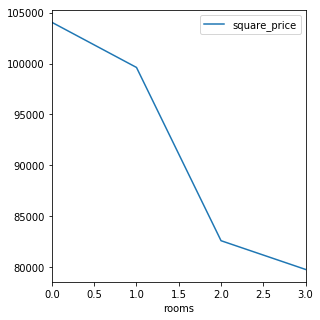

In [22]:
plt.subplots(figsize = (10, 5))
plot = pd.pivot_table(new_data.query('rooms < 4'), index = 'rooms', values = 'square_price', aggfunc = 'mean').plot(ax = plt.subplot(1, 2, 1))


При построении графика средних значений мы отсекаем 4 и 5 комнатные квартиры, так как их количество слишком мало.

На основании построенного  графика можно сделать вывод, что:
    Для квартир с большим количеством комнат характерно уменьшение цены квадратного метра.

In [23]:
report = new_data.corr()[['square_price', 'last_price']] #результат corr - это dataframe, к нему можно применять все обычные трансформации


use_categories = ['last_price', 'total_area', 'floors_total', 'kitchen_area', 'citCenter']

report.sort_values(by = 'last_price', ascending = False)




,square_price,last_price
last_price,0.868282,1.000000
square_price,1.000000,0.868282
area,-0.131074,0.359187
total_area,-0.131074,0.359187
floors_total,0.414805,0.346204
kitchen_area,0.259718,0.342901
floor,0.292542,0.246433
parks_around3000,0.228654,0.222098
total_images,0.139994,0.156810
kit_to_tot,0.310545,0.149731


Делаем следующие выводы:
    1. Существует прямая положительная корреляция между ценой квадратного метра и последней ценой, количеством этаже и соотношением kit_to_tot. (Чем больше второе значение, тем больше цена м2)
    2. Существует прямая отрицательная корреляция между ценой квадртаного метра и количеством комнат и жилой площадью (чем меньше второе значение, тем выше цена.
    3. Существует прямая положительная корреляция между  последней ценой и общей площадью, количеством этажей и площадью кухни. (Чем больше второе значение, тем больше цена м2).
    4. Отрицательной корреляциией можно пренебречь, так как ее величина около 0,2, что незначительно влияет на результаты.
    

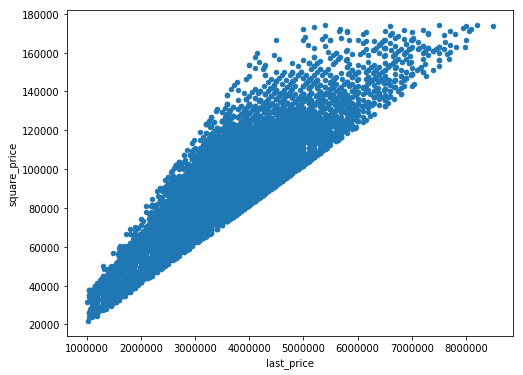

In [24]:
new_data.sort_values('last_price').plot(kind='scatter', y = 'square_price', x = 'last_price', figsize=(8, 6))



На основании построенного графика видна прямая зависиимость: с увеличением  цены за квадратный метр увеличивается общая стоимость жилья. Отклонений в расределении данных не выявлено.
    

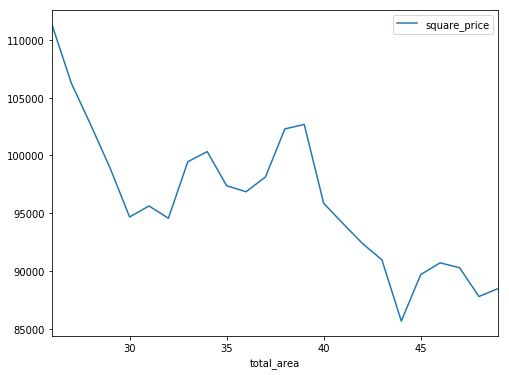

In [25]:
new_data.pivot_table(index = ['total_area'], values = 'square_price', aggfunc = 'mean').reset_index().plot( y = 'square_price', x = 'total_area', figsize=(8, 6))


На основании построенного графика можно сделать вывод, что с увеличение общей площади отмечается уменьшение средней стоимости квадратного метра при росте площади более 40 м2. Если площадь возрастает до 40 м2, то также прослеживается тенденция к увеличению кв.м.


Особенно высокая цена для квартир площадью 20м2, что характерно для студий.

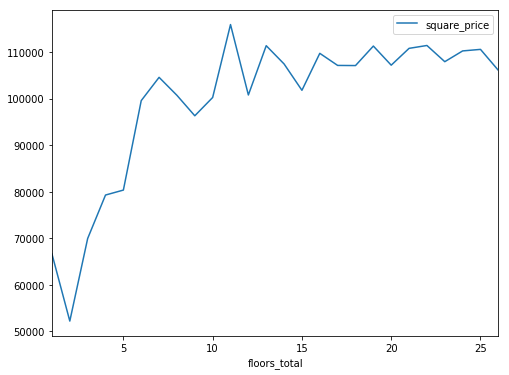

In [26]:
new_data.pivot_table(index = ['floors_total'], values = 'square_price', aggfunc = 'mean').query('floors_total < 27').reset_index().plot( y = 'square_price', x = 'floors_total', figsize=(8, 6))



На основании построенного графика можно сделать вывод, что с увеличением высоты здания увеличивается и стоимость м2. Минмальные значения в райне 3 этажей характерно для частных домов и малоэтажного строительсттва. 

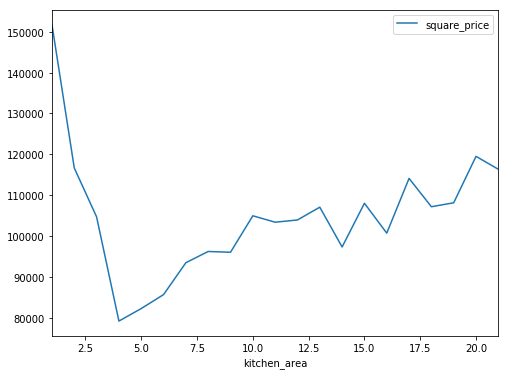

In [27]:
new_data.pivot_table(index = ['kitchen_area'], values = 'square_price', aggfunc = 'mean').reset_index().plot( y = 'square_price', x = 'kitchen_area', figsize=(8, 6))


На основании построенного графика можно сделать вывод, что с увеличением площади кухни увеличивается и стоиомость кв.м. 

Максимальная цена в квартирах с площадью 0м2 характерно для объектов свободной планировки.

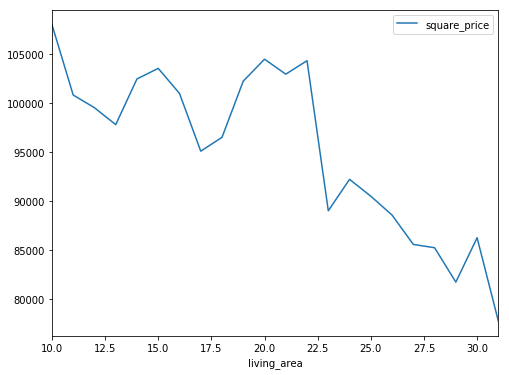

In [28]:
new_data.pivot_table(index = ['living_area'], values = 'square_price', aggfunc = 'mean').query('living_area < 32').reset_index().plot( y = 'square_price', x = 'living_area', figsize=(8, 6))



На основании построенного графика можно сделать вывод, что при увеличении жилой площади отмечается падение средней стоимости м2.

#####  Изучение зависимости цены за кв. м. от этажа

In [29]:
floor_price = new_data.pivot_table(index = ['floor_type'], values = 'square_price', aggfunc = ['mean', 'count'])

floor_price

,mean,count
,square_price,square_price
floor_type,,
другой,98437.904859,7070
первый,81887.663611,1182
последний,84836.158716,1275


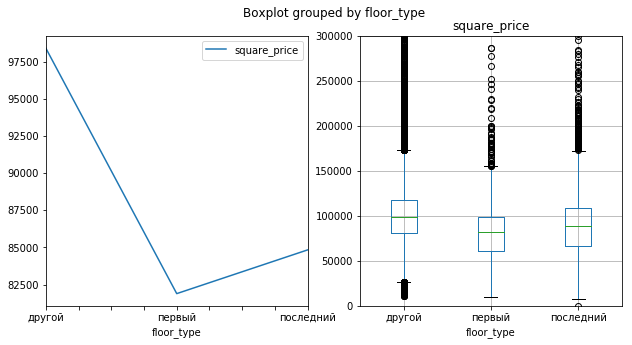

In [30]:
plt.subplots(figsize = (10, 5))
plot = pd.pivot_table(new_data, index = 'floor_type', values = 'square_price', aggfunc = 'mean').plot(ax = plt.subplot(1, 2, 1))
plot = data.boxplot('square_price', by = 'floor_type', ax = plt.subplot(1, 2, 2))
lim = plot.set_ylim(0, 300000)

## Выводы:

На основании построенных графиков можно сделать следующие выводы:
    1. Наименьшая цена характерна для первого этажа, большее значение для последнего, максимальная - для любого другого.
    2. Для первого этажа характерна цена в пределах от 60 до 100 т.р.
    3. Для последнего этажа характерна цена в пределах от 75 до 110 т.р.
    4. Для другого этажа характерна цена в пределах от 80 до 125 т.р.

#####  Изучение зависимости цены за кв. м. от удаленности от центра

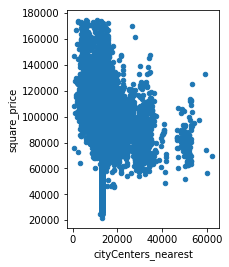

In [31]:
new_data.plot(kind = 'scatter', x = 'cityCenters_nearest', y = 'square_price', ax = plt.subplot(1, 2, 1))



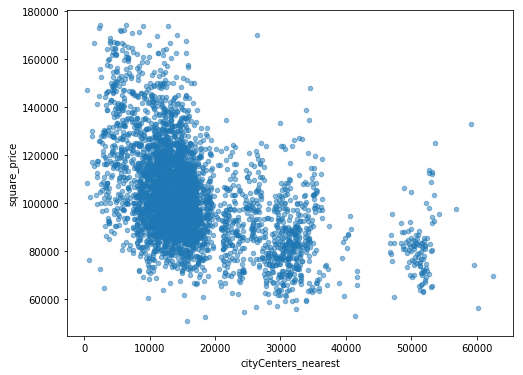

In [32]:
new_data.pivot_table(index = ['cityCenters_nearest'], values = 'square_price', aggfunc = 'mean').reset_index().plot(alpha = 0.5, kind='scatter', y = 'square_price', x = 'cityCenters_nearest', figsize=(8, 6))




#####  Изучение зависимости цены за кв. м. от времени размещения объявления

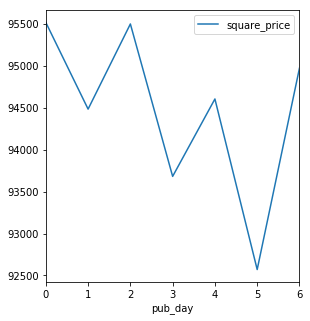

In [33]:
plt.subplots(figsize = (10, 5))
plot = pd.pivot_table(new_data, index = 'pub_day', values = 'square_price', aggfunc = 'mean').plot(ax = plt.subplot(1, 2, 1))


На основании построенных графиков можно сделать следующие выводы:
    1. Минимальная цена за квадратный метр характерна для объявлений, которые создавались в субботу, несколько больше - в четверг.
    2. Максимальная цена за квадратный метр характерна для объявлений, которые создавались в пн и ср, несколько меньше - во вт и вс.
    

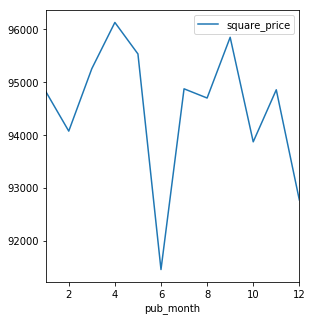

In [34]:
plt.subplots(figsize = (10, 5))
plot = pd.pivot_table(new_data, index = 'pub_month', values = 'square_price', aggfunc = 'mean').plot(ax = plt.subplot(1, 2, 1))


На основании построенных графиков можно сделать следующие выводы:
    1. Минимальная цена за квадратный метр характерна для объявлений, которые создавались в июне, несколько больше - в декабре.
    2. Максимальная цена за квадратный метр характерна для объявлений, которые создавались в апреле, несколько меньше - в сентябре.
    

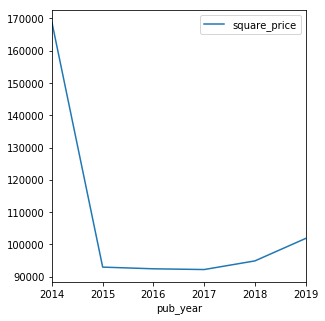

In [35]:
plt.subplots(figsize = (10, 5))
plot = pd.pivot_table(new_data, index = 'pub_year', values = 'square_price', aggfunc = 'mean').plot(ax = plt.subplot(1, 2, 1))


На основании построенных графиков можно сделать следующие выводы:
    1. Максимальная цена за квадратный метр характерна для объявлений, которые создавались 2014 году.
    2. В 2015 г. отмечается резкое уменьшение цены с тенденцией к постепенному увеличению.
    

## Выводы #3.

В данном задании использовались лишь диаграммы рассеивания для того, чтобы оценить величину разброса цены, а также коэффициент корреляции, с помощью которого становится возможно оцениить взаимосвязь цены за кв.м. от тех или иных параметров.



## Вопрос №4. Что можно сказать о цене квадратног метра в пригородах?

In [36]:
city_pivot  = new_data.pivot_table(index = ['locality_name'], values = 'square_price', aggfunc = ['count'])

city_pivot.columns = ['count']

city_pivot = city_pivot.query('count  > 100').sort_values(by = 'count', ascending = False).reset_index()

city_pivot




,locality_name,count
0,санкт-петербург,5883
1,посёлок мурино,290
2,посёлок шушары,193
3,посёлок парголово,172
4,колпино,159
5,гатчина,157
6,всеволожск,149
7,деревня кудрово,139
8,пушкин,139
9,петергоф,102


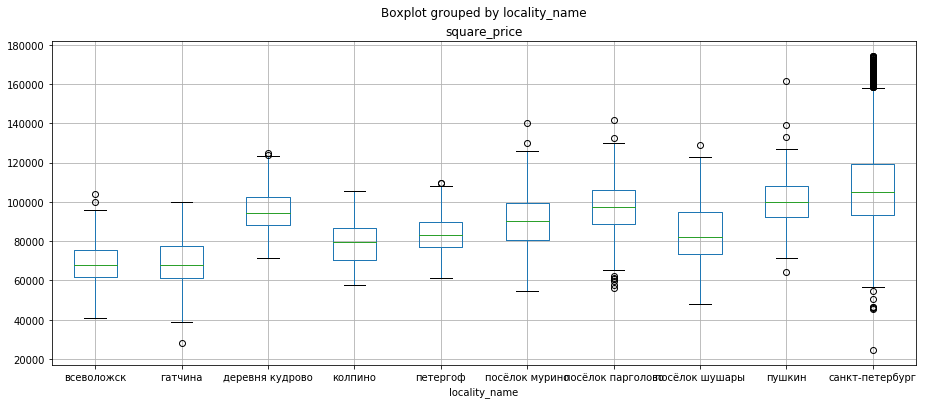

In [37]:
top_10_locations = ( new_data.groupby('locality_name')                             
                             .agg({'last_price': 'count',                          
                                   'cityCenters_nearest': 'median'})                
                             .sort_values(by = 'last_price', ascending = False)
                             .head(10))  
plot = ( new_data.query('locality_name in @top_10_locations.index')
                 .boxplot('square_price', by = 'locality_name', figsize = (15, 6)))



## Выводы #4.

Наданном этапе исследования использовались сводные таблицы для получения "регионов", с наибольшим количеством объявлений. Затем строились графики с помощью boxplot, чтобы определить разброс цен в том или ином регионе.

На основании проделанной работы можно сделать следующие выводы:
    1. Цена квадратного  метра в Санкт-Петербурге варьируется в пределах от 90  до  120 т.р. Медиана составляет 105 т.р.
    2. Цена квадратного  метра в поселке Мурино варьируется в пределах от 80  до  100 т.р. Медиана составляет 90 т.р.
    3. Цена квадратного  метра в поселке Шушары варьируется в пределах от  75 до 95 т.р. Медиана составляет 80 т.р.
    4. Цена квадратного  метра в поселке Парголово варьируется в пределах от 90  до  105 т.р. Медиана составляет 95 т.р.
    5. Цена квадратного  метра в Колпино варьируется в пределах от 70  до  85 т.р. Медиана составляет 80 т.р.
    6. Цена квадратного  метра в Гатчине варьируется в пределах от  60 до  75 т.р. Медиана составляет 68 т.р.
    7. Цена квадратного  метра во Всеволожске варьируется в пределах от 62  до  75 . Медиана составляет 68 т.р.
    8. Цена квадратного  метра в Пушкино варьируется в пределах от 95  до  110 т.р. Медиана составляет 100 т.р.
    9. Цена квадратного  метра в Кудрово варьируется в пределах от  88 до  105 т.р. Медиана составляет  95  т.р.
    10. Цена квадратного  метра в Петергофе варьируется в пределах от  75 до 90  т.р. Медиана составляет 84 т.р.

# Вопрос №5. Выделите сегменты типичных квартир в центре (по удаленности, числу комнат и площади). 

Оценка объявлений в Санкт-Петербурге:

In [38]:
spb_data = new_data.copy()
spb_data = spb_data.query('locality_name == "санкт-петербург"')


spb_data.head(10)



,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,floor_type,liv_to_tot,kit_to_tot
10,"10,10,",5,5050000,39,2017-11-16,1,2.670000,12,20,3,...,2,553,137,129487.179487,3,11,2017,другой,0.512821,0.205128
15,"15,15,",16,4650000,39,2017-11-18,1,2.771499,14,20,5,...,1,296,19,119230.769231,5,11,2017,другой,0.512821,0.179487
18,"18,18,",8,3250000,31,2017-01-27,1,2.500000,5,19,2,...,0,502,168,104838.709677,4,1,2017,другой,0.612903,0.161290
21,"21,21,1568643.0",13,3200000,31,2018-03-14,1,2.771499,5,16,2,...,0,502,310,103225.806452,2,3,2018,другой,0.516129,0.161290
34,"34,34,",3,3290000,33,2018-02-04,1,2.550000,16,14,3,...,0,502,15,99696.969697,6,2,2018,другой,0.424242,0.242424
36,"36,36,",13,3790000,45,2017-01-25,2,2.771499,9,27,9,...,0,502,139,84222.222222,2,1,2017,последний,0.600000,0.133333
44,"44,44,",13,5350000,40,2018-11-18,1,2.771499,22,30,3,...,1,1152,0,133750.000000,6,11,2018,другой,0.750000,0.225000
48,"48,48,",10,3600000,33,2017-10-03,1,2.771499,24,15,6,...,1,170,322,109090.909091,1,10,2017,другой,0.454545,0.272727
49,"49,49,",1,3050000,30,2018-11-22,1,2.500000,9,18,7,...,0,502,0,101666.666667,3,11,2018,другой,0.600000,0.200000
54,"54,54,",6,3320000,36,2017-04-14,1,2.771499,24,14,6,...,0,502,44,92222.222222,4,4,2017,другой,0.388889,0.333333


In [39]:
def dist_loc(sets):
    
    dist =  sets['cityCenters_nearest']
    #if dist < 5000:
    #    return 'до 5 км'
    #if dist < 7500:
    #    return 'до 7,5 км'
    if dist < 10000:
        return 'до 10 км'
    if dist > 10000:
        return 'более 10 км'
    else:
         return 'другое'


spb_data.reset_index()


spb_data['center_group'] = spb_data.apply(dist_loc, axis = 1)
spb_data.pivot_table(index = 'center_group', values = 'square_price', aggfunc = ['count'])



,count
,square_price
center_group,
более 10 км,4854
до 10 км,1029


Для анализа допустимо объедиинить значенииие до 10 км, чтобы получить необходимое количество данных для анализа.

/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

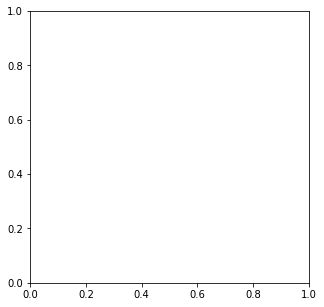

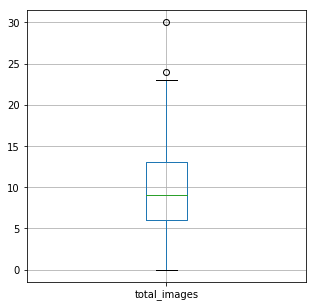

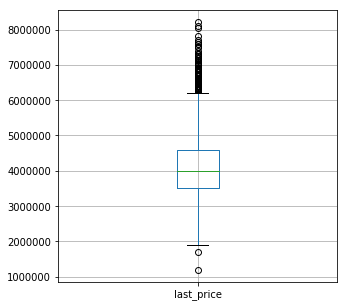

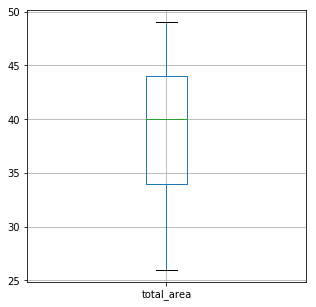

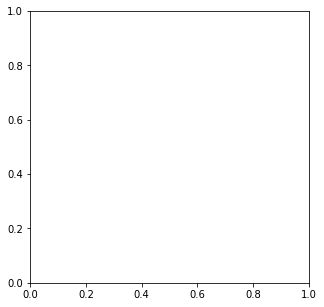

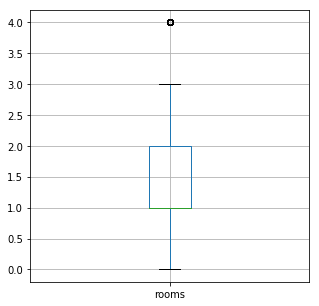

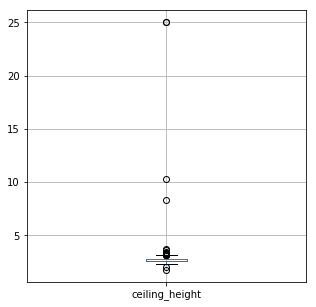

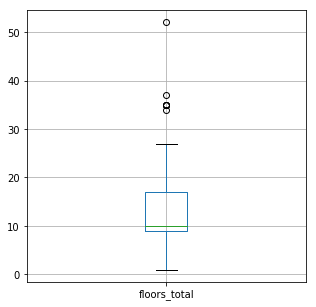

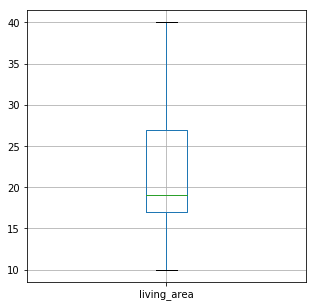

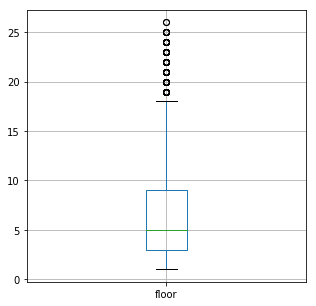

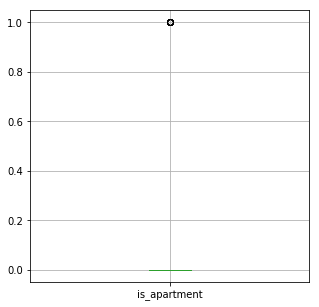

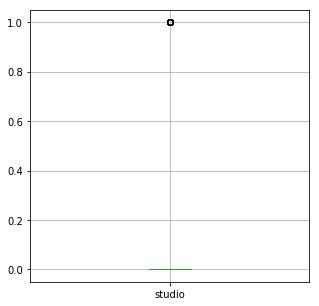

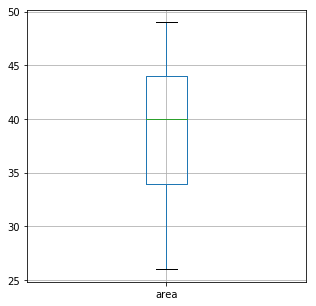

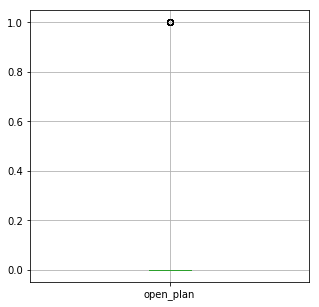

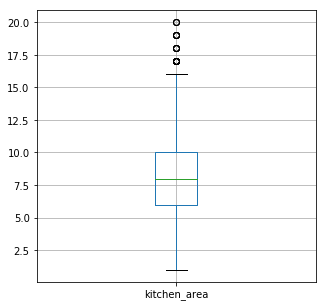

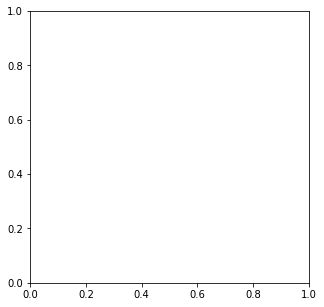

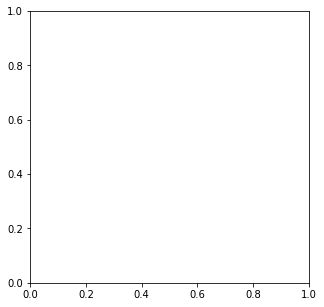

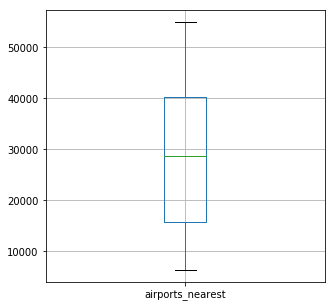

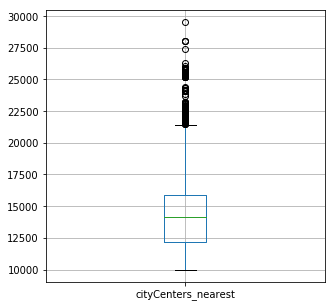

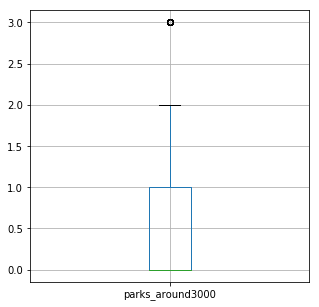

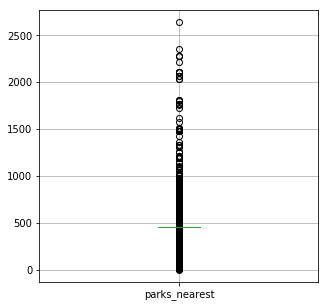

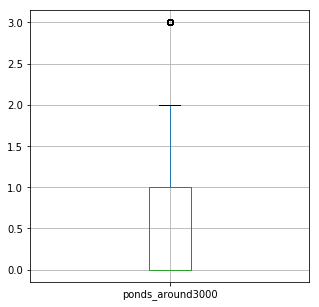

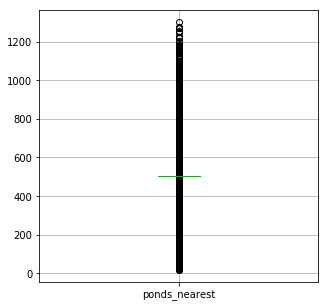

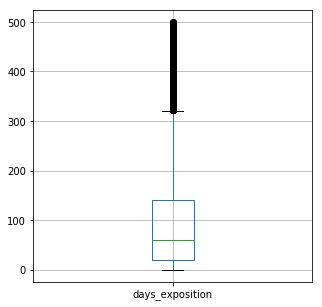

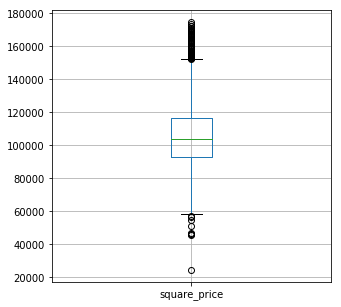

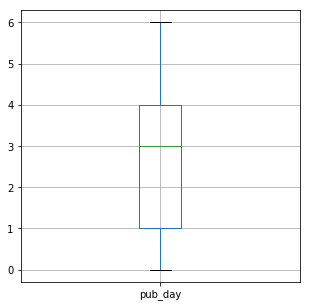

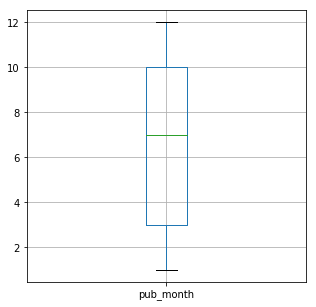

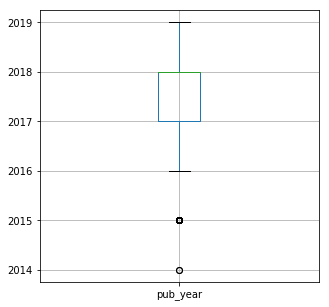

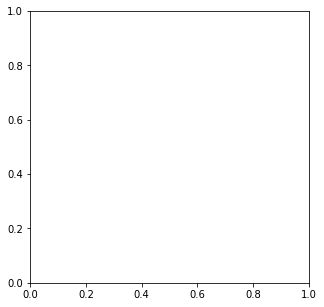

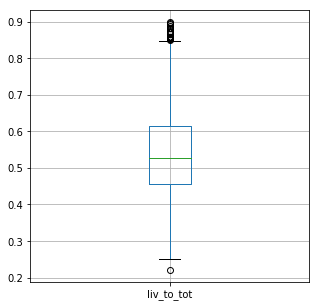

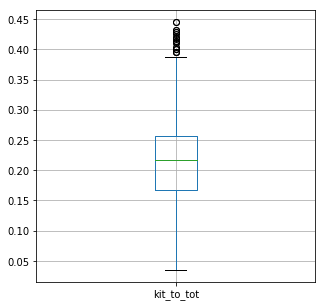

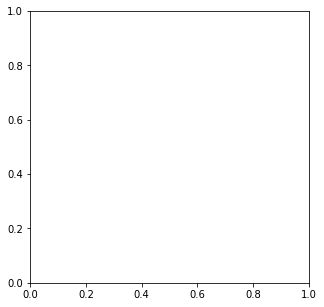

In [40]:
plt.subplots(figsize = (5, 5))

spb_step = spb_data.query('center_group == "более 10 км"')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе расстояния от центра "более 10 км" типичны следующие параметры:
    1. Количество изображений в объявлении - от 6 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 3,5 до 4,5 млн. Медиана - 4 млн.
    3. Общая площадь квартиры составляет от 34 до 44 м2. Медиана - 40 м2.
    4. Количество комнат от 1 до 2, больше 1 к.кв.
    5. Количество этажей в доме от 9 до 15.
    6. Жилая площадь квартиры - от 16 до 27 кв.м. Медиана - 19 м2.
    7. Этаж - от 4 до 9.
    8. Площадь кухни от 6 до 10 м2. Медиана - 7,6 м2.
    9. Ближайший аэропорт на расстоянии от  16 до 40 км. Медиана - 28 км.
    10. Центр города на расстоянии от  12 до 16 км. Медиана - 14 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 95 до 115 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,45 до 0,65.
    14. Соотношение площади кухни к общей в пределах от 0,16 до 0,26.

/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

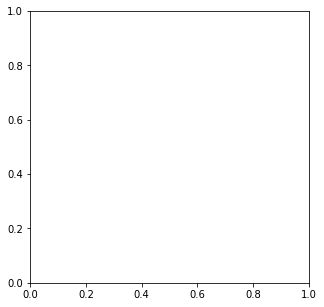

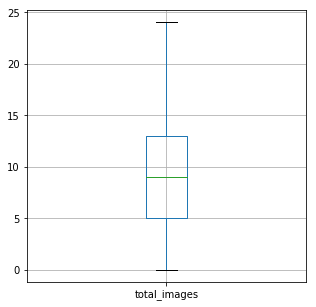

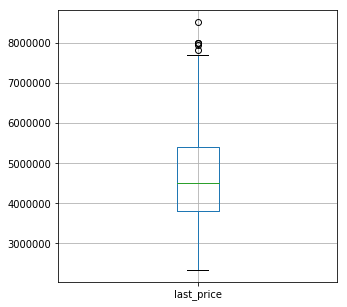

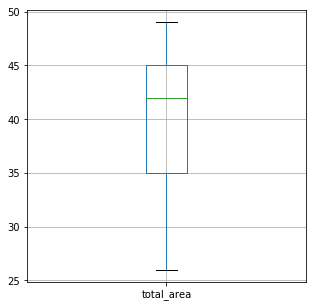

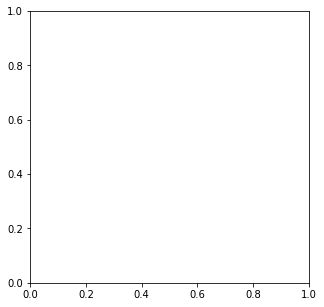

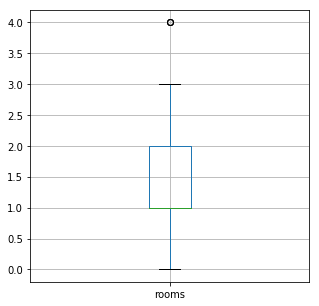

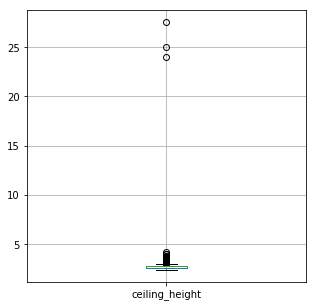

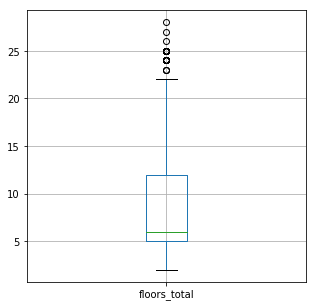

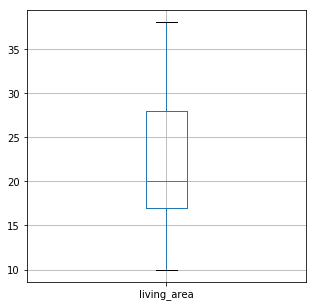

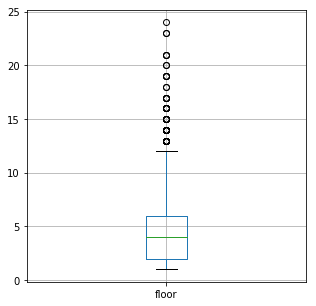

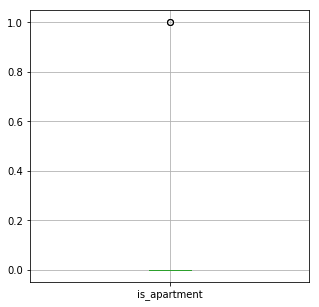

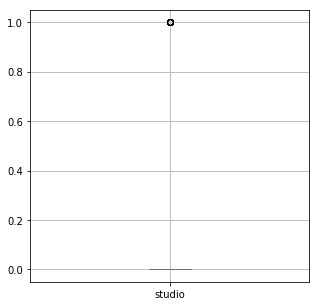

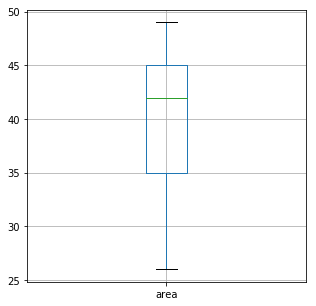

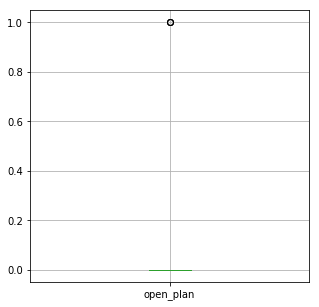

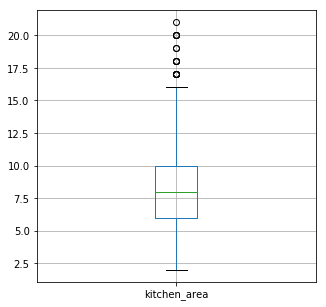

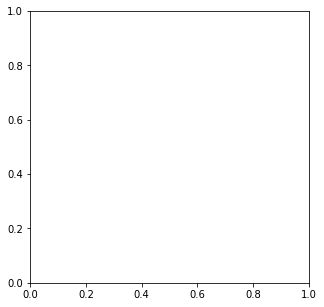

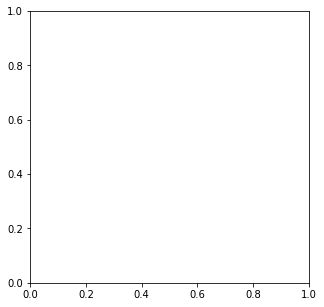

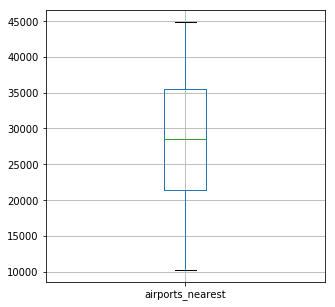

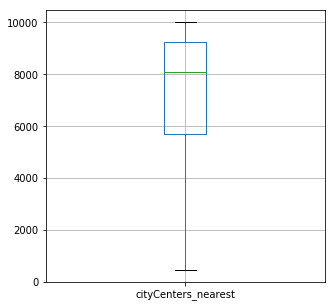

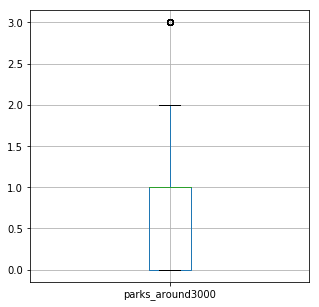

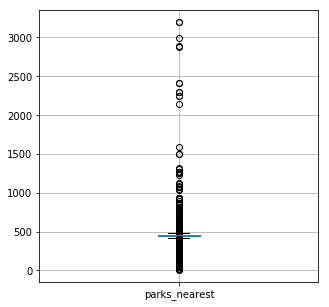

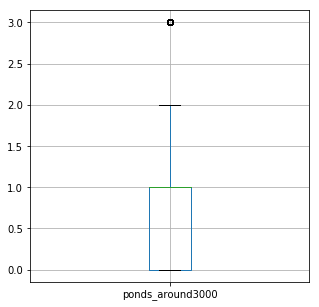

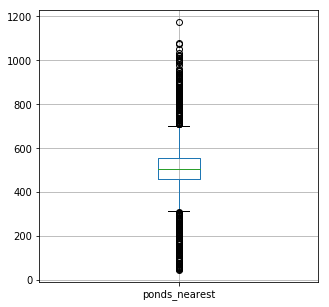

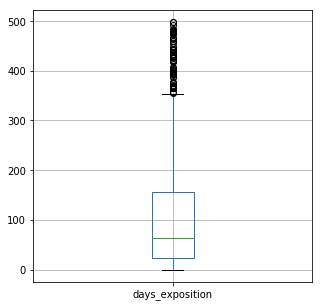

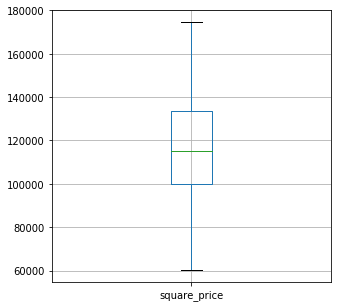

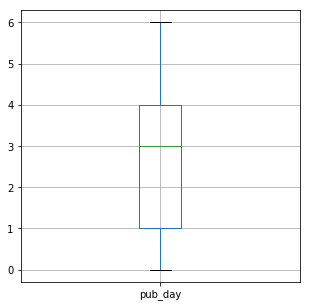

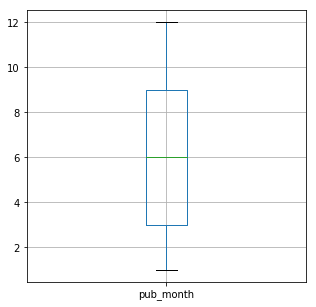

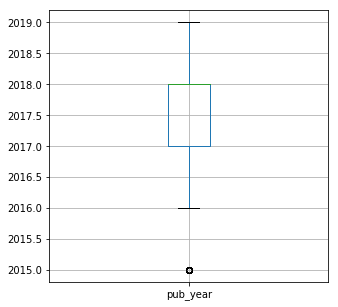

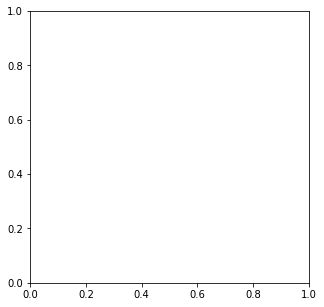

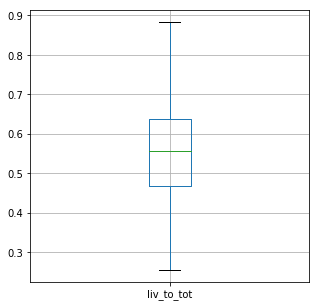

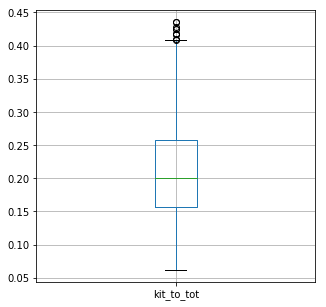

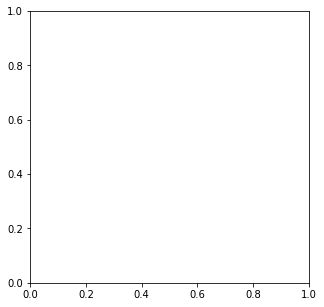

In [41]:
plt.subplots(figsize = (5, 5))

spb_step = spb_data.query('center_group == "до 10 км"')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе расстояния от центра "до 10 км" типичны следующие параметры:
    1. Количество изображений в объявлении - от 5 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 3,9 до 5,5 млн. Медиана - 4,5 млн.
    3. Общая площадь квартиры составляет от 35 до 45 м2. Медиана - 43 м2.
    4. Количество комнат от 1 до 2, больше 1 к.кв.
    5. Количество этажей в доме от 5 до 13.
    6. Жилая площадь квартиры - от 17 до 27 кв.м. Медиана - 19 м2.
    7. Этаж - от 3 до 6.
    8. Площадь кухни от 6 до 10 м2. Медиана - 8 м2.
    9. Ближайший аэропорт на расстоянии от  21 до 35 км. Медиана - 28 км.
    10. Центр города на расстоянии от  5 до 9 км. Медиана - 8 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 100 до 130 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,47 до 0,62.
    14. Соотношение площади кухни к общей в пределах от 0,16 до 0,26.

<font color='magenta'><b>Комментарий наставника 2:</b> нужны выводы и наблюдения.</font> 

### Промежуточные выводы:


In [42]:
spb_data.query('rooms < 5 and rooms != 0').pivot_table(index = 'rooms', values = 'square_price', aggfunc = ['count'])

,count
,square_price
rooms,
1,4081
2,1603
3,79
4,61


/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

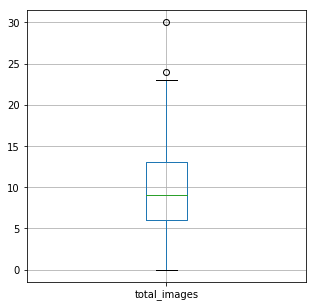

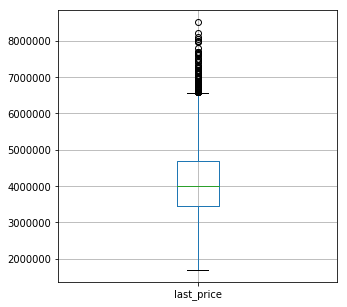

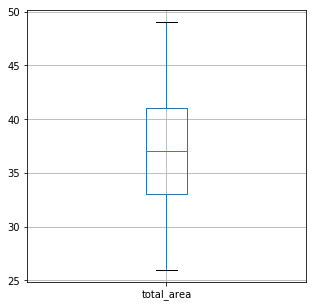

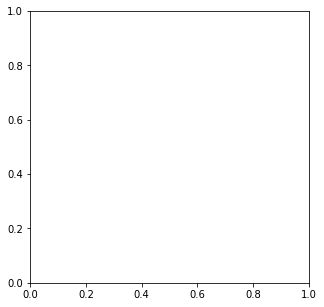

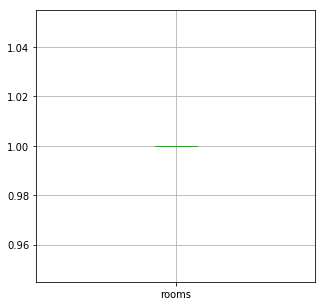

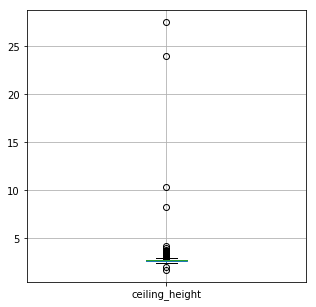

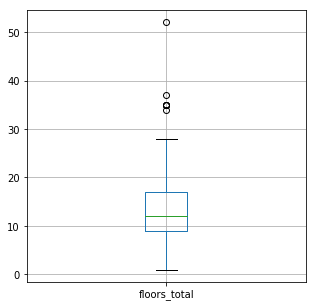

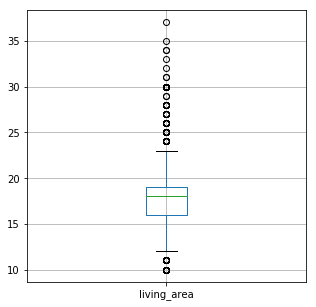

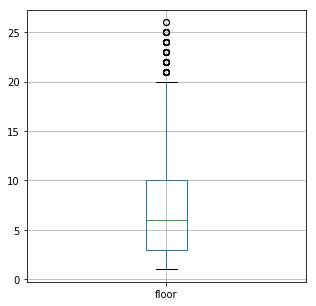

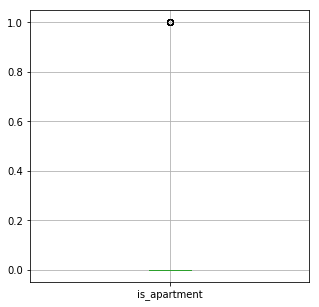

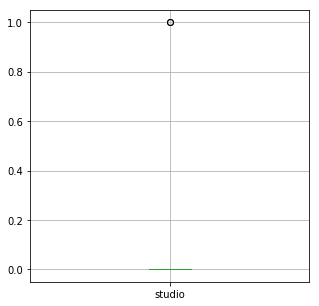

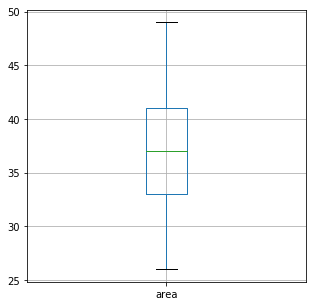

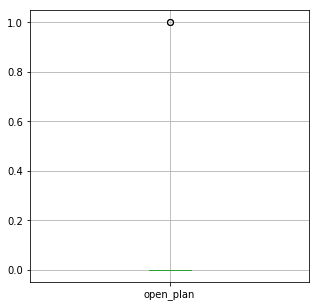

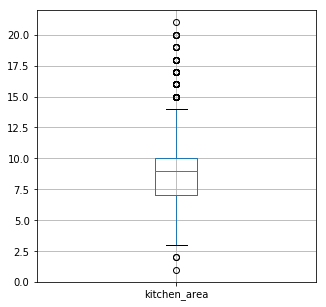

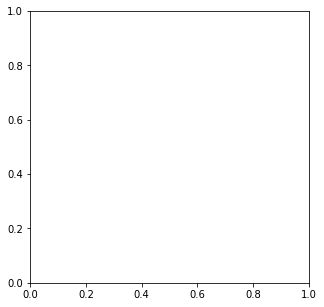

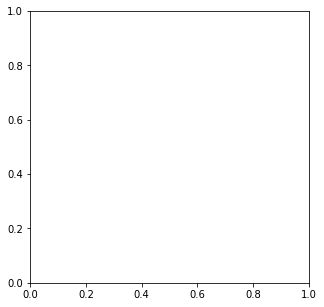

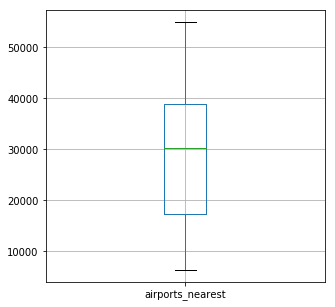

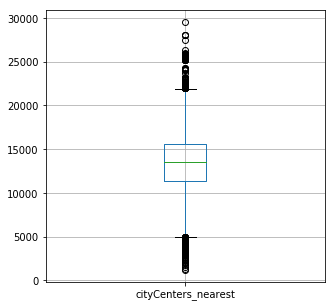

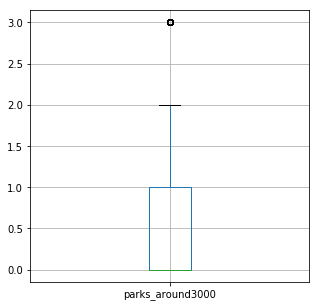

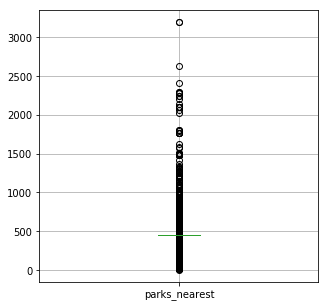

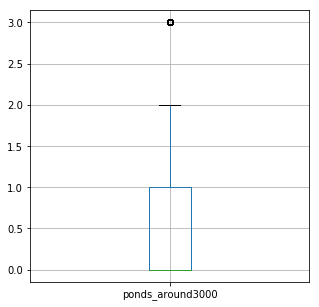

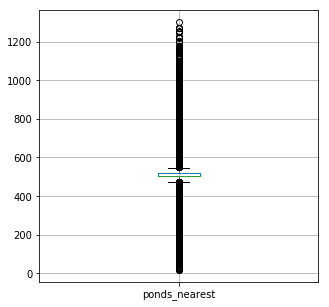

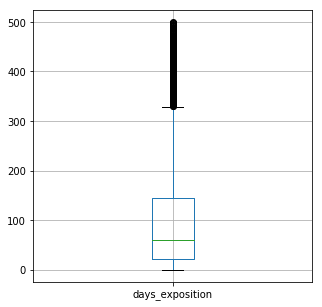

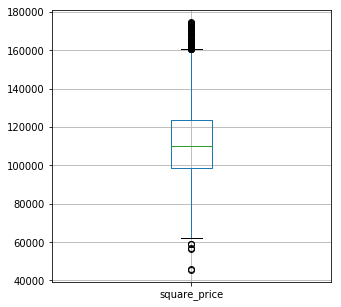

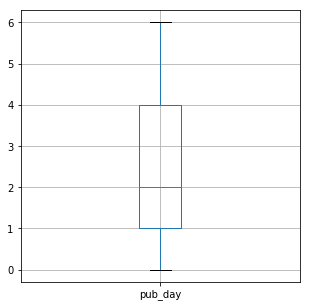

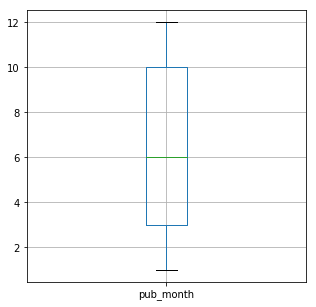

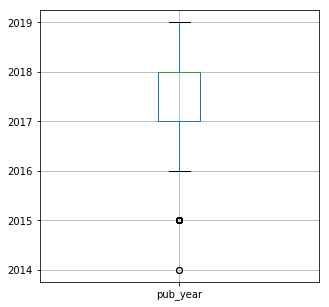

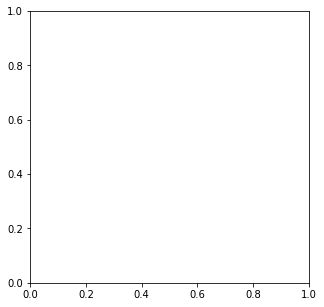

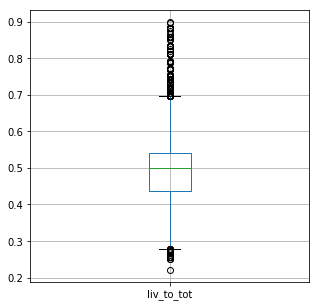

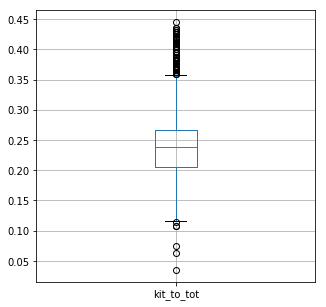

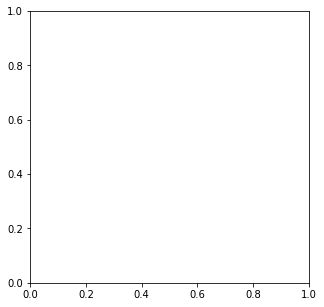

In [43]:
spb_step = spb_data.query('rooms == 1')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе 1 комната типичны следующие параметры:
    1. Количество изображений в объявлении - от 6 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 3,5 до 4,5 млн. Медиана - 4 млн.
    3. Общая площадь квартиры составляет от 33 до 41 м2. Медиана - 37 м2.
    5. Количество этажей в доме от 9 до 16.
    6. Жилая площадь квартиры - от 16 до 19 кв.м. Медиана - 17 м2.
    7. Этаж - от 3 до 10.
    8. Площадь кухни от 7 до 10 м2. Медиана - 8 м2.
    9. Ближайший аэропорт на расстоянии от  19 до 39 км. Медиана - 30 км.
    10. Центр города на расстоянии от  12 до 16 км. Медиана - 14 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 98 до 125 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,45 до 0,65.
    14. Соотношение площади кухни к общей в пределах от 0,2 до 0,27.

/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

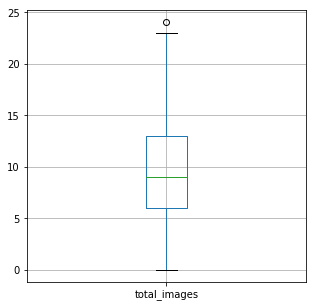

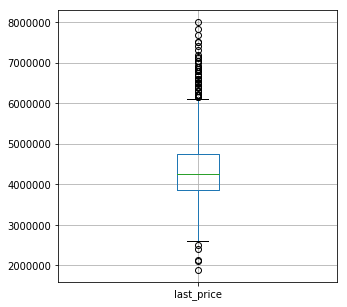

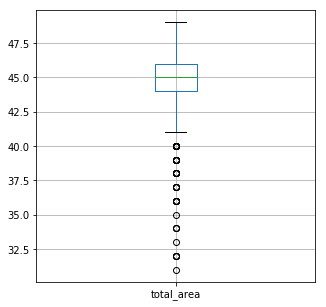

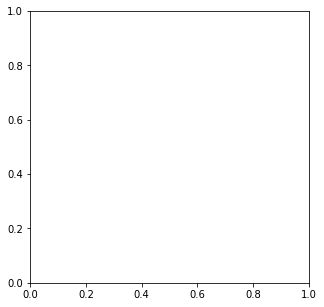

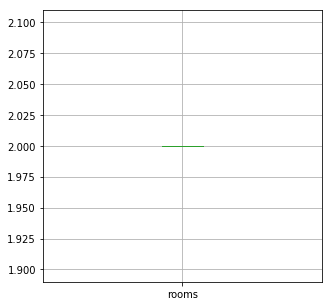

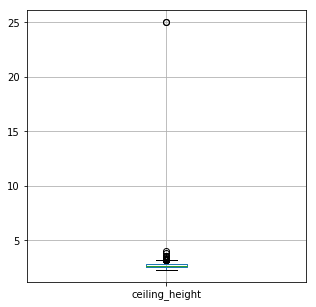

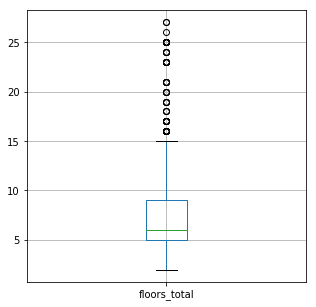

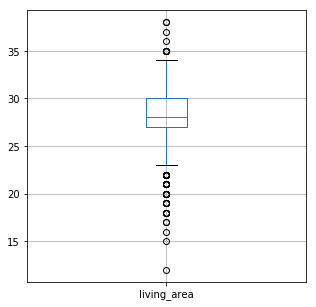

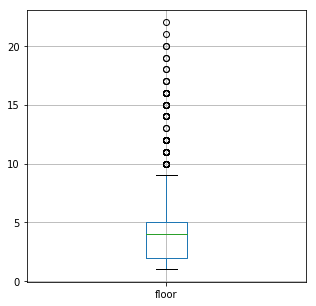

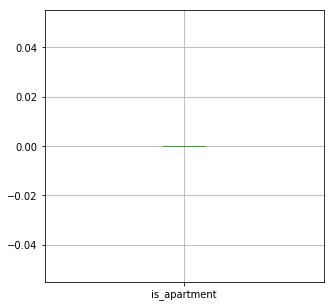

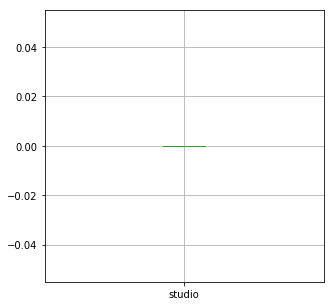

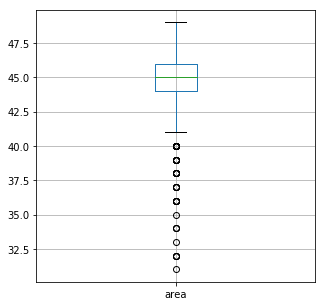

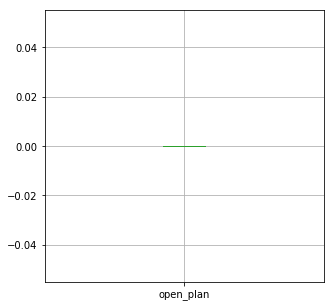

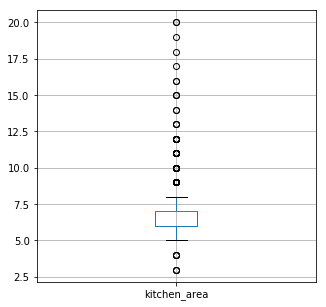

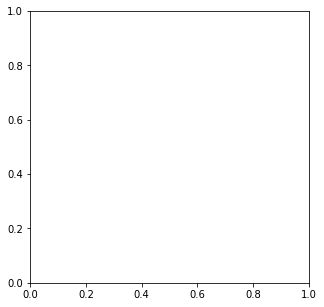

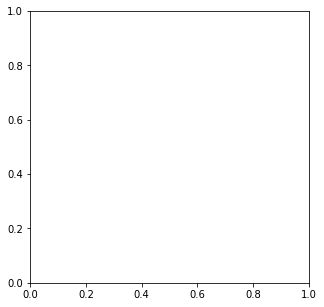

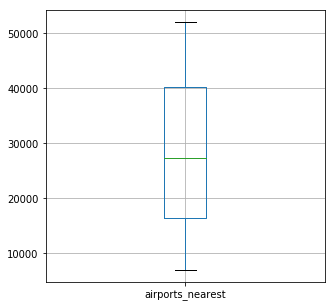

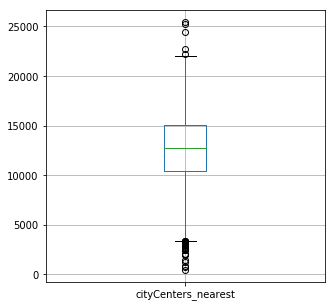

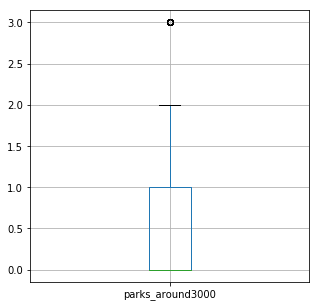

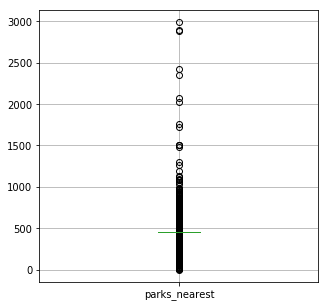

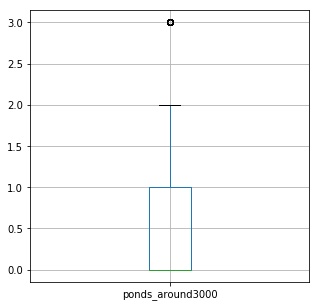

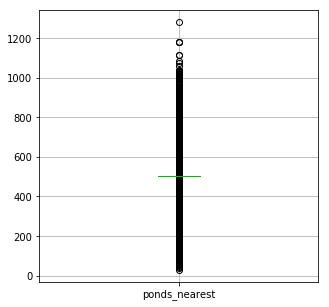

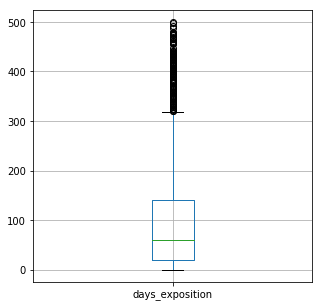

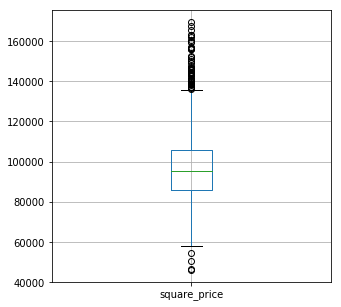

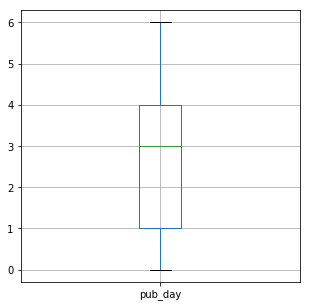

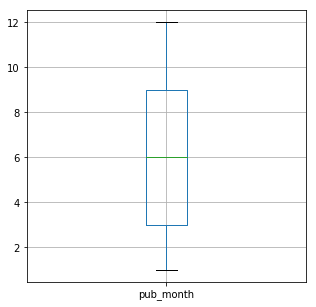

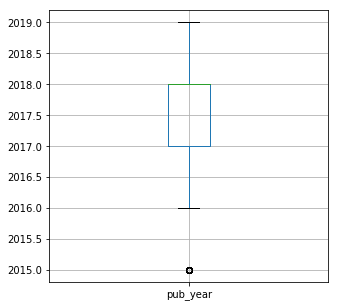

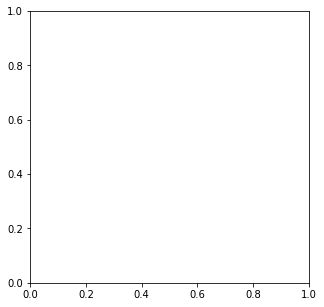

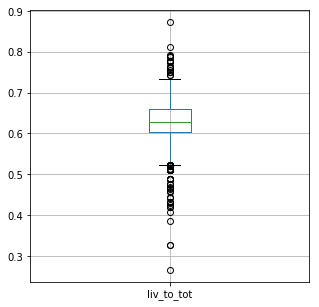

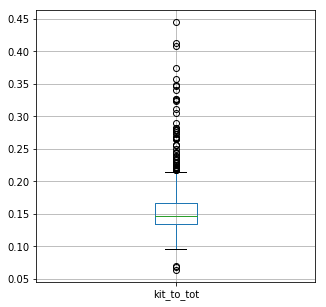

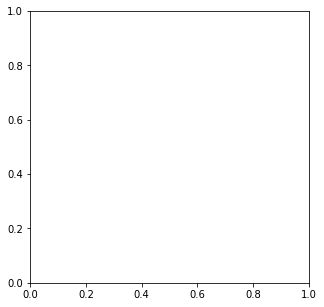

In [44]:
spb_step = spb_data.query('rooms == 2')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе 2 комнаты типичны следующие параметры:
    1. Количество изображений в объявлении - от 6 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 3,9 до 4,8 млн. Медиана - 4,1 млн.
    3. Общая площадь квартиры составляет от 44 до 46 м2. Медиана - 45 м2.
    5. Количество этажей в доме от 5 до 9.
    6. Жилая площадь квартиры - от 27 до 30 кв.м. Медиана - 28,5 м2.
    7. Этаж - от 3 до 5.
    8. Площадь кухни от 6 до 7 м2.
    9. Ближайший аэропорт на расстоянии от  18 до 40 км. Медиана - 27 км.
    10. Центр города на расстоянии от  10 до 15 км. Медиана - 13 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 85 до 105 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,6 до 0,65.
    14. Соотношение площади кухни к общей в пределах от 0,14 до 0,17.

### Промежуточные выводы:


In [45]:
def square_div(sets):
    area = sets['total_area']
   
    if area < 30:
        return 'до 30 м2'
    if area < 40:
        return 'до 40 м2'
    if area < 50:
        return 'до 50 м2'
    if area < 75:
        return 'до 75 м2'
    if area < 100:
        return 'до 100 м2'
    if area < 200:
        return 'до 200 м2'
    else:
        return 'другое'


spb_data['area_div'] = spb_data.apply(square_div, axis = 1)
spb_data.query('area_div != "другое"').pivot_table(index = 'area_div', values = 'square_price', aggfunc = 'count')

,square_price
area_div,
до 30 м2,223
до 40 м2,2610
до 50 м2,3050


/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

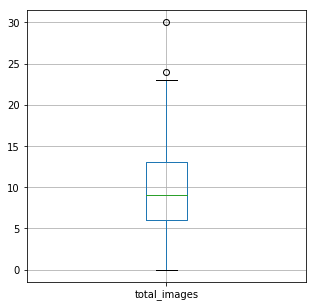

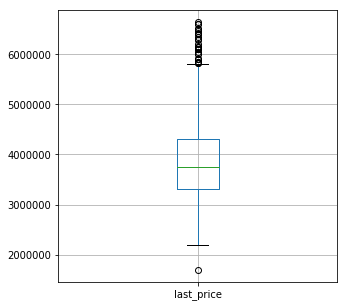

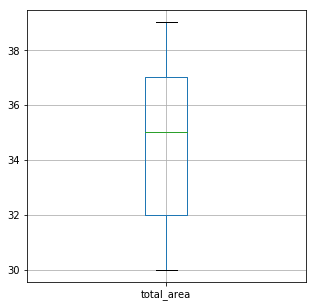

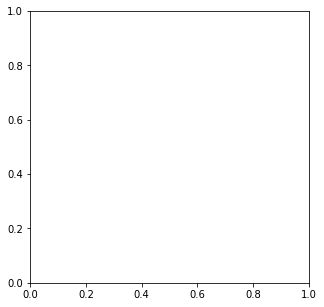

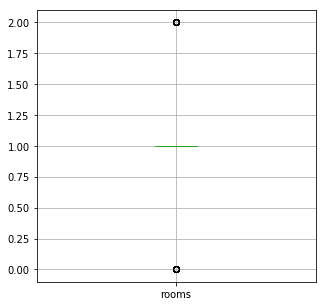

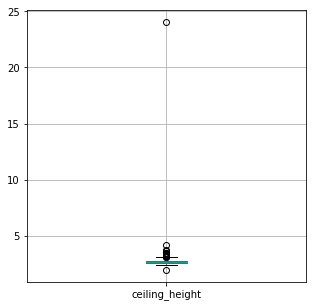

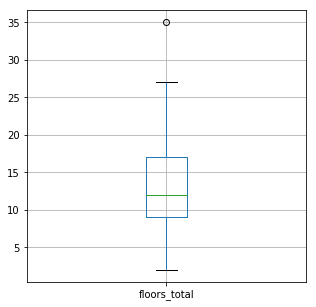

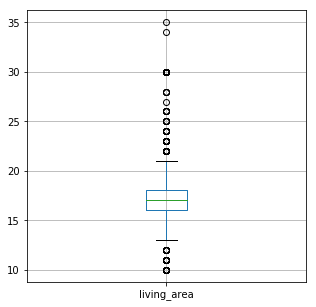

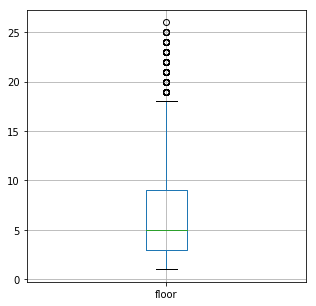

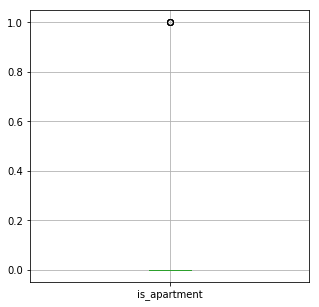

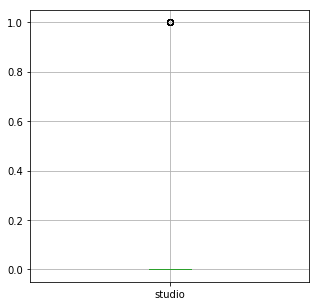

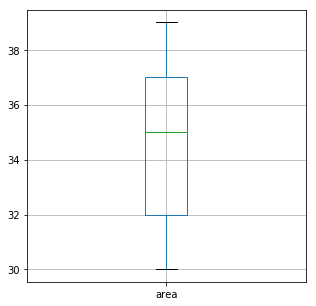

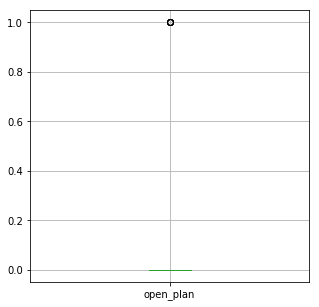

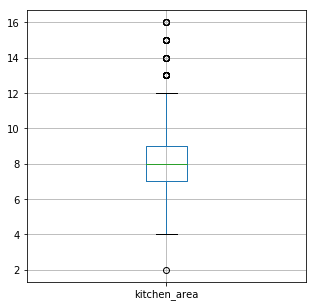

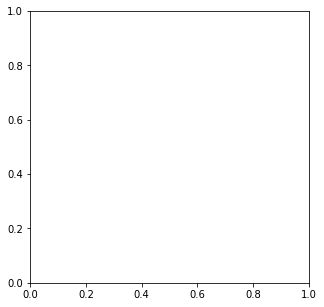

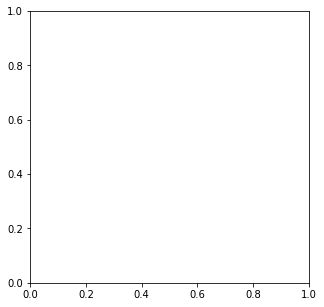

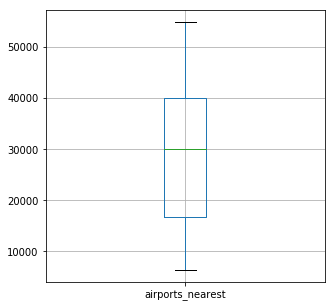

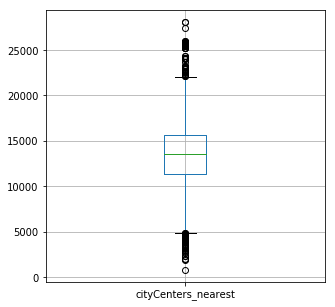

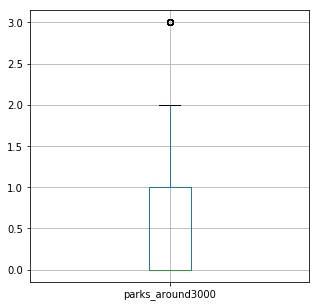

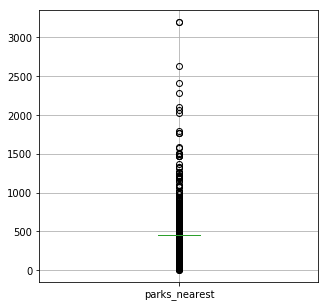

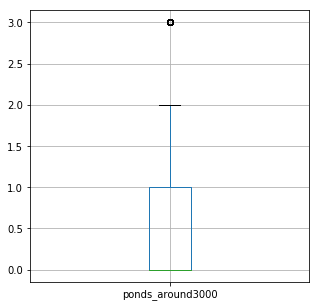

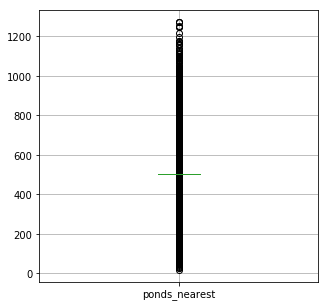

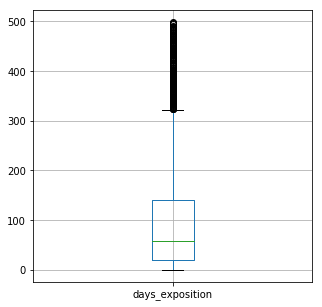

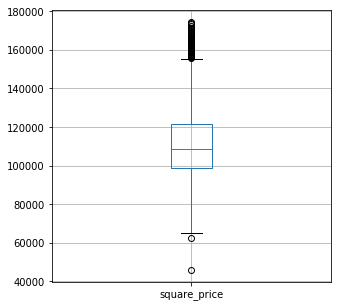

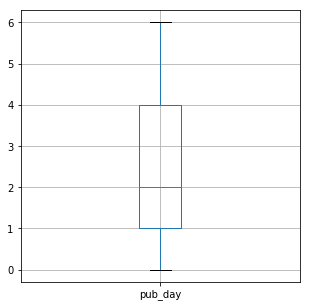

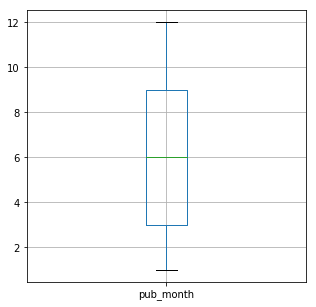

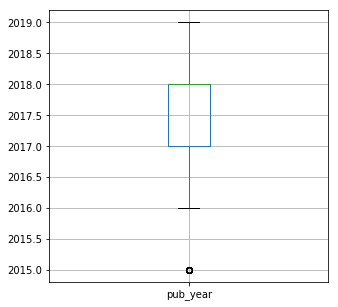

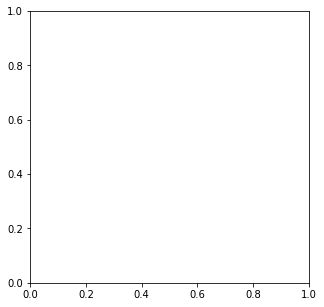

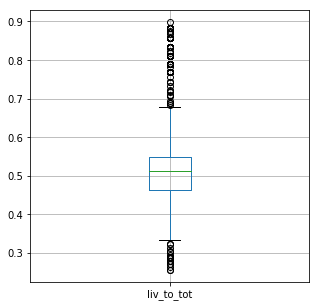

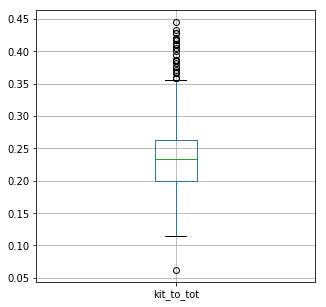

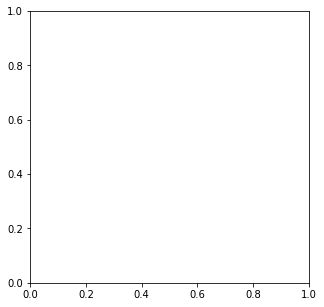

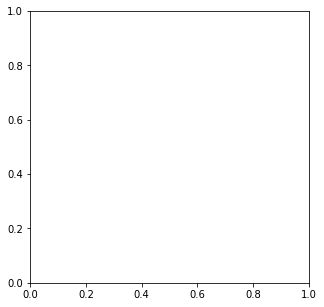

In [46]:
spb_step = spb_data.query('area_div == "до 40 м2"')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе площадь квартиры "до 40 м2" типичны следующие параметры:
    1. Количество изображений в объявлении - от 6 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 3,4 до 4,2 млн. Медиана - 3,8 млн.
    3. Общая площадь квартиры составляет от 32 до 37 м2. Медиана - 34 м2.
    4. Количество комнат от 1 до 2, больше 1 к.кв.
    5. Количество этажей в доме от 9 до 17.
    6. Жилая площадь квартиры - от 16 до 18 кв.м. Медиана - 17 м2.
    7. Этаж - от 3 до 9.
    8. Площадь кухни от 7 до 10 м2. Медиана - 8 м2.
    9. Ближайший аэропорт на расстоянии от  19 до 40 км. Медиана - 30 км.
    10. Центр города на расстоянии от  11 до 16 км. Медиана - 14 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 100 до 120 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,47 до 0,55.
    14. Соотношение площади кухни к общей в пределах от 0,2 до 0,26.

/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/garynich/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

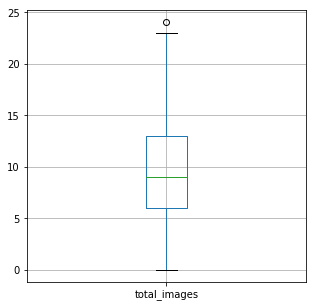

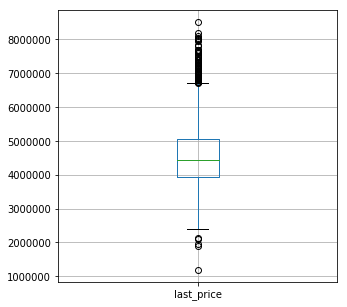

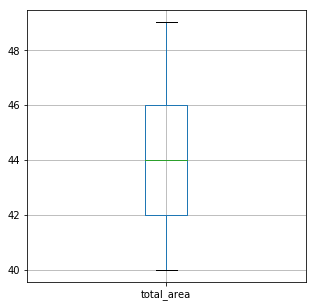

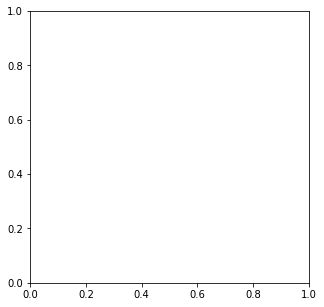

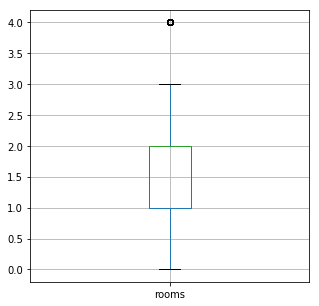

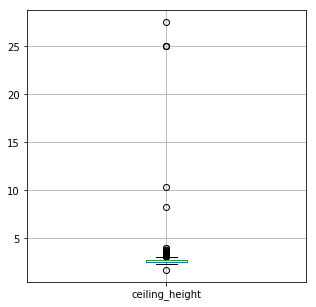

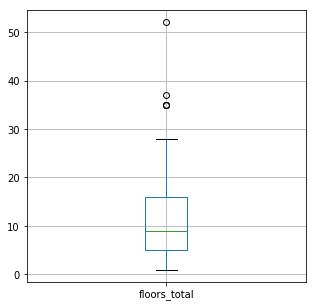

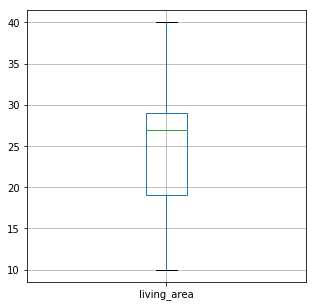

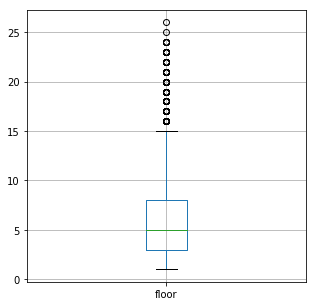

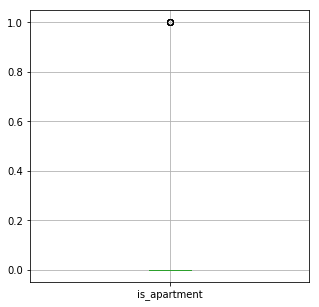

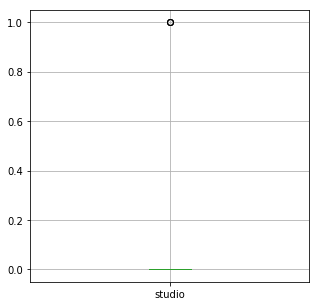

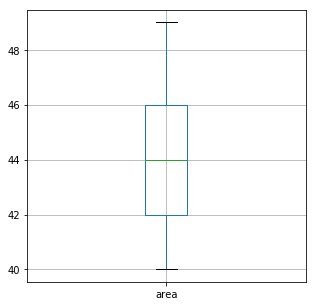

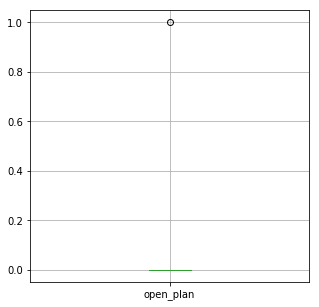

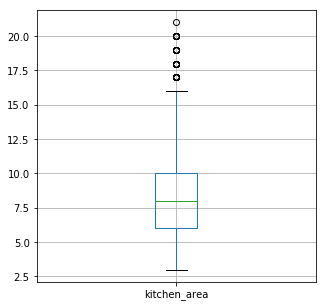

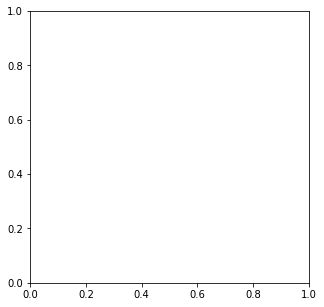

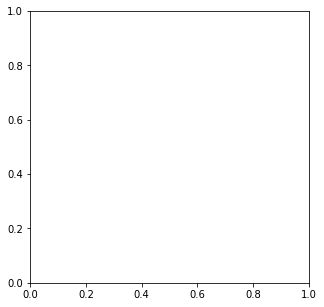

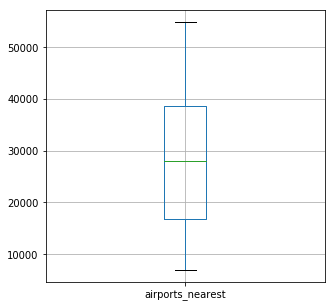

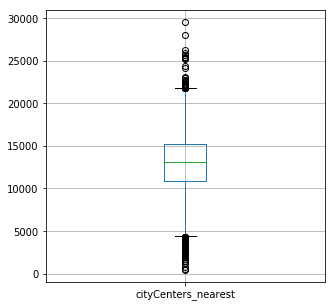

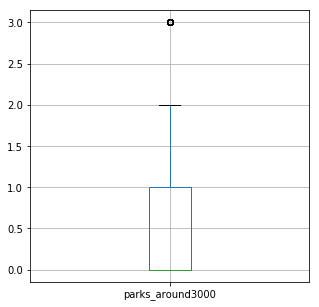

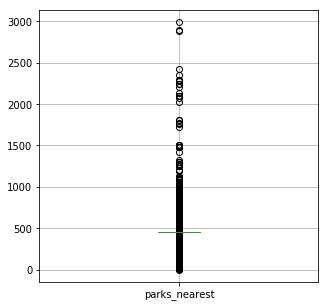

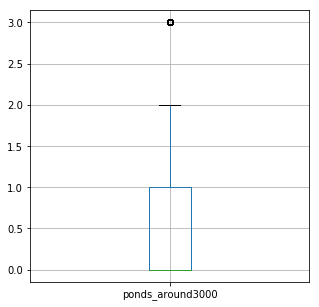

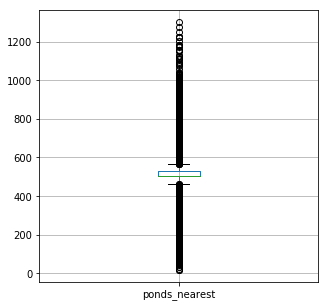

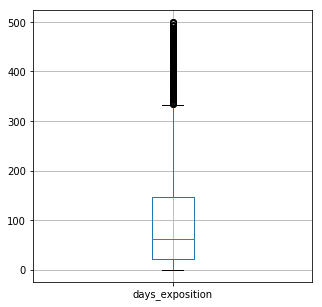

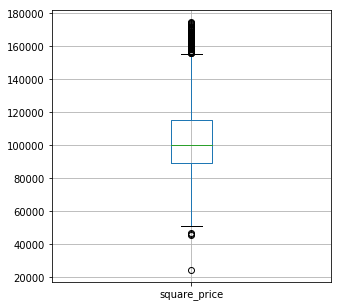

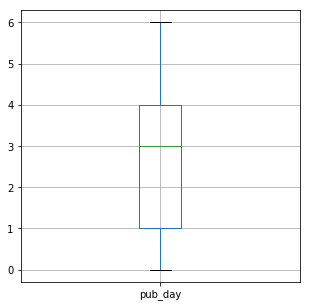

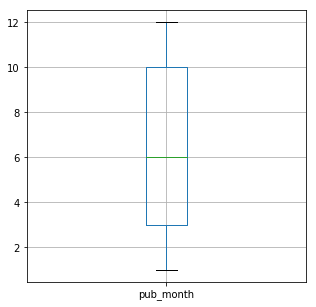

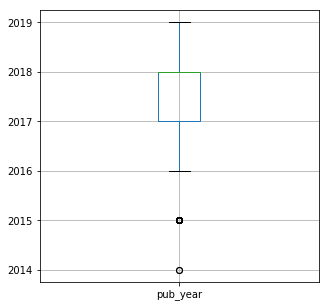

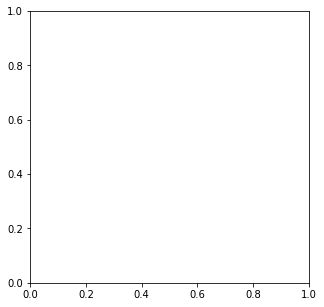

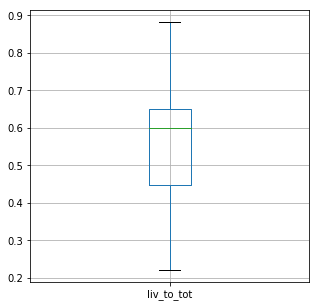

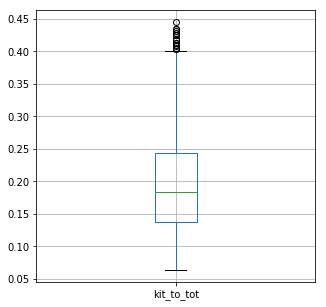

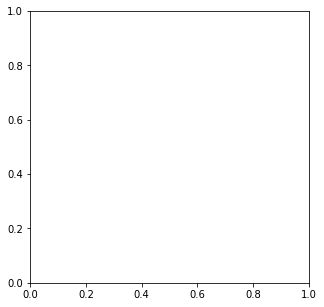

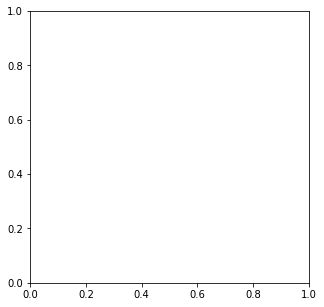

In [47]:
spb_step = spb_data.query('area_div == "до 50 м2"')


for i in spb_step.columns:
    if i!= 'building_series_id':
        try:
            plt.subplots(figsize = (5, 5))
            new = spb_step.boxplot(i)
        except:
            pass

На основании построенных графиков размаха можно сделать следующие выводы, что для категории квартир в группе площадь квартиры "до 50 м2" типичны следующие параметры:
    1. Количество изображений в объявлении - от 6 до 13. Медиана - 9.
    2. Последняя цена за квартиру - от 4 до 5 млн. Медиана - 4,5 млн.
    3. Общая площадь квартиры составляет от 42 до 46 м2. Медиана - 44 м2.
    4. Количество комнат от 1 до 2, больше 1 к.кв.
    5. Количество этажей в доме от 5 до 16.
    6. Жилая площадь квартиры - от 19 до 29 кв.м. Медиана - 27 м2.
    7. Этаж - от 4 до 7.
    8. Площадь кухни от 6 до 10 м2. Медиана - 8 м2.
    9. Ближайший аэропорт на расстоянии от  17 до 39 км. Медиана - 28 км.
    10. Центр города на расстоянии от  11 до 15 км. Медиана - 13 км.
    11. Объявление размещается на срок от 25 до 150 дней.
    12. Цена квадратного метра варьируется в пределах от 90 до 115 т.р.
    13. Соотношение жилой площади к общей в пределах от 0,45 до 0,65.
    14. Соотношение площади кухни к общей в пределах от 0,14 до 0,25.

# Вопрос №6. Наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену?

In [48]:
apart_data = new_data.query('is_apartment == True')

apart_data.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,floor_type,liv_to_tot,kit_to_tot
2975,"2975,2975,",9,4931398,42,2018-07-23,1,3.15,4,20,3,...,1,792,273,117414.238095,0,7,2018,другой,0.476190,0.238095
5076,"5076,5076,1564812.0",0,3850000,30,2018-10-03,1,24.00,5,19,1,...,1,578,7,128333.333333,2,10,2018,первый,0.633333,0.166667
7206,"7206,7206,",7,5289476,46,2018-07-18,1,3.15,4,16,2,...,1,792,278,114988.608696,2,7,2018,другой,0.347826,0.304348
7362,"7362,7362,",18,4300000,41,2018-06-12,1,2.65,20,13,6,...,0,502,44,104878.048780,1,6,2018,другой,0.317073,0.268293
11179,"11179,11179,",8,3676365,33,2018-07-23,1,3.00,4,27,1,...,1,792,0,111405.000000,0,7,2018,первый,0.818182,0.272727
11779,"11779,11779,",12,2290000,43,2017-06-09,2,2.50,5,29,2,...,1,502,46,53255.813953,4,6,2017,другой,0.674419,0.116279
12160,"12160,12160,",8,2450000,43,2018-08-14,1,2.75,5,16,1,...,0,502,8,56976.744186,1,8,2018,первый,0.372093,0.209302
16166,"16166,16166,",13,4792000,49,2017-08-07,1,3.12,4,21,3,...,1,792,337,97795.918367,0,8,2017,другой,0.428571,0.265306
19034,"19034,19034,",20,4100000,32,2017-04-07,1,2.70,27,16,22,...,1,767,388,128125.000000,4,4,2017,другой,0.500000,0.250000
20008,"20008,20008,",8,5400000,31,2018-02-21,1,2.75,9,20,5,...,3,177,8,174193.548387,2,2,2018,другой,0.645161,0.193548


/Users/garynich/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117bd4630>,
      dtype=object)

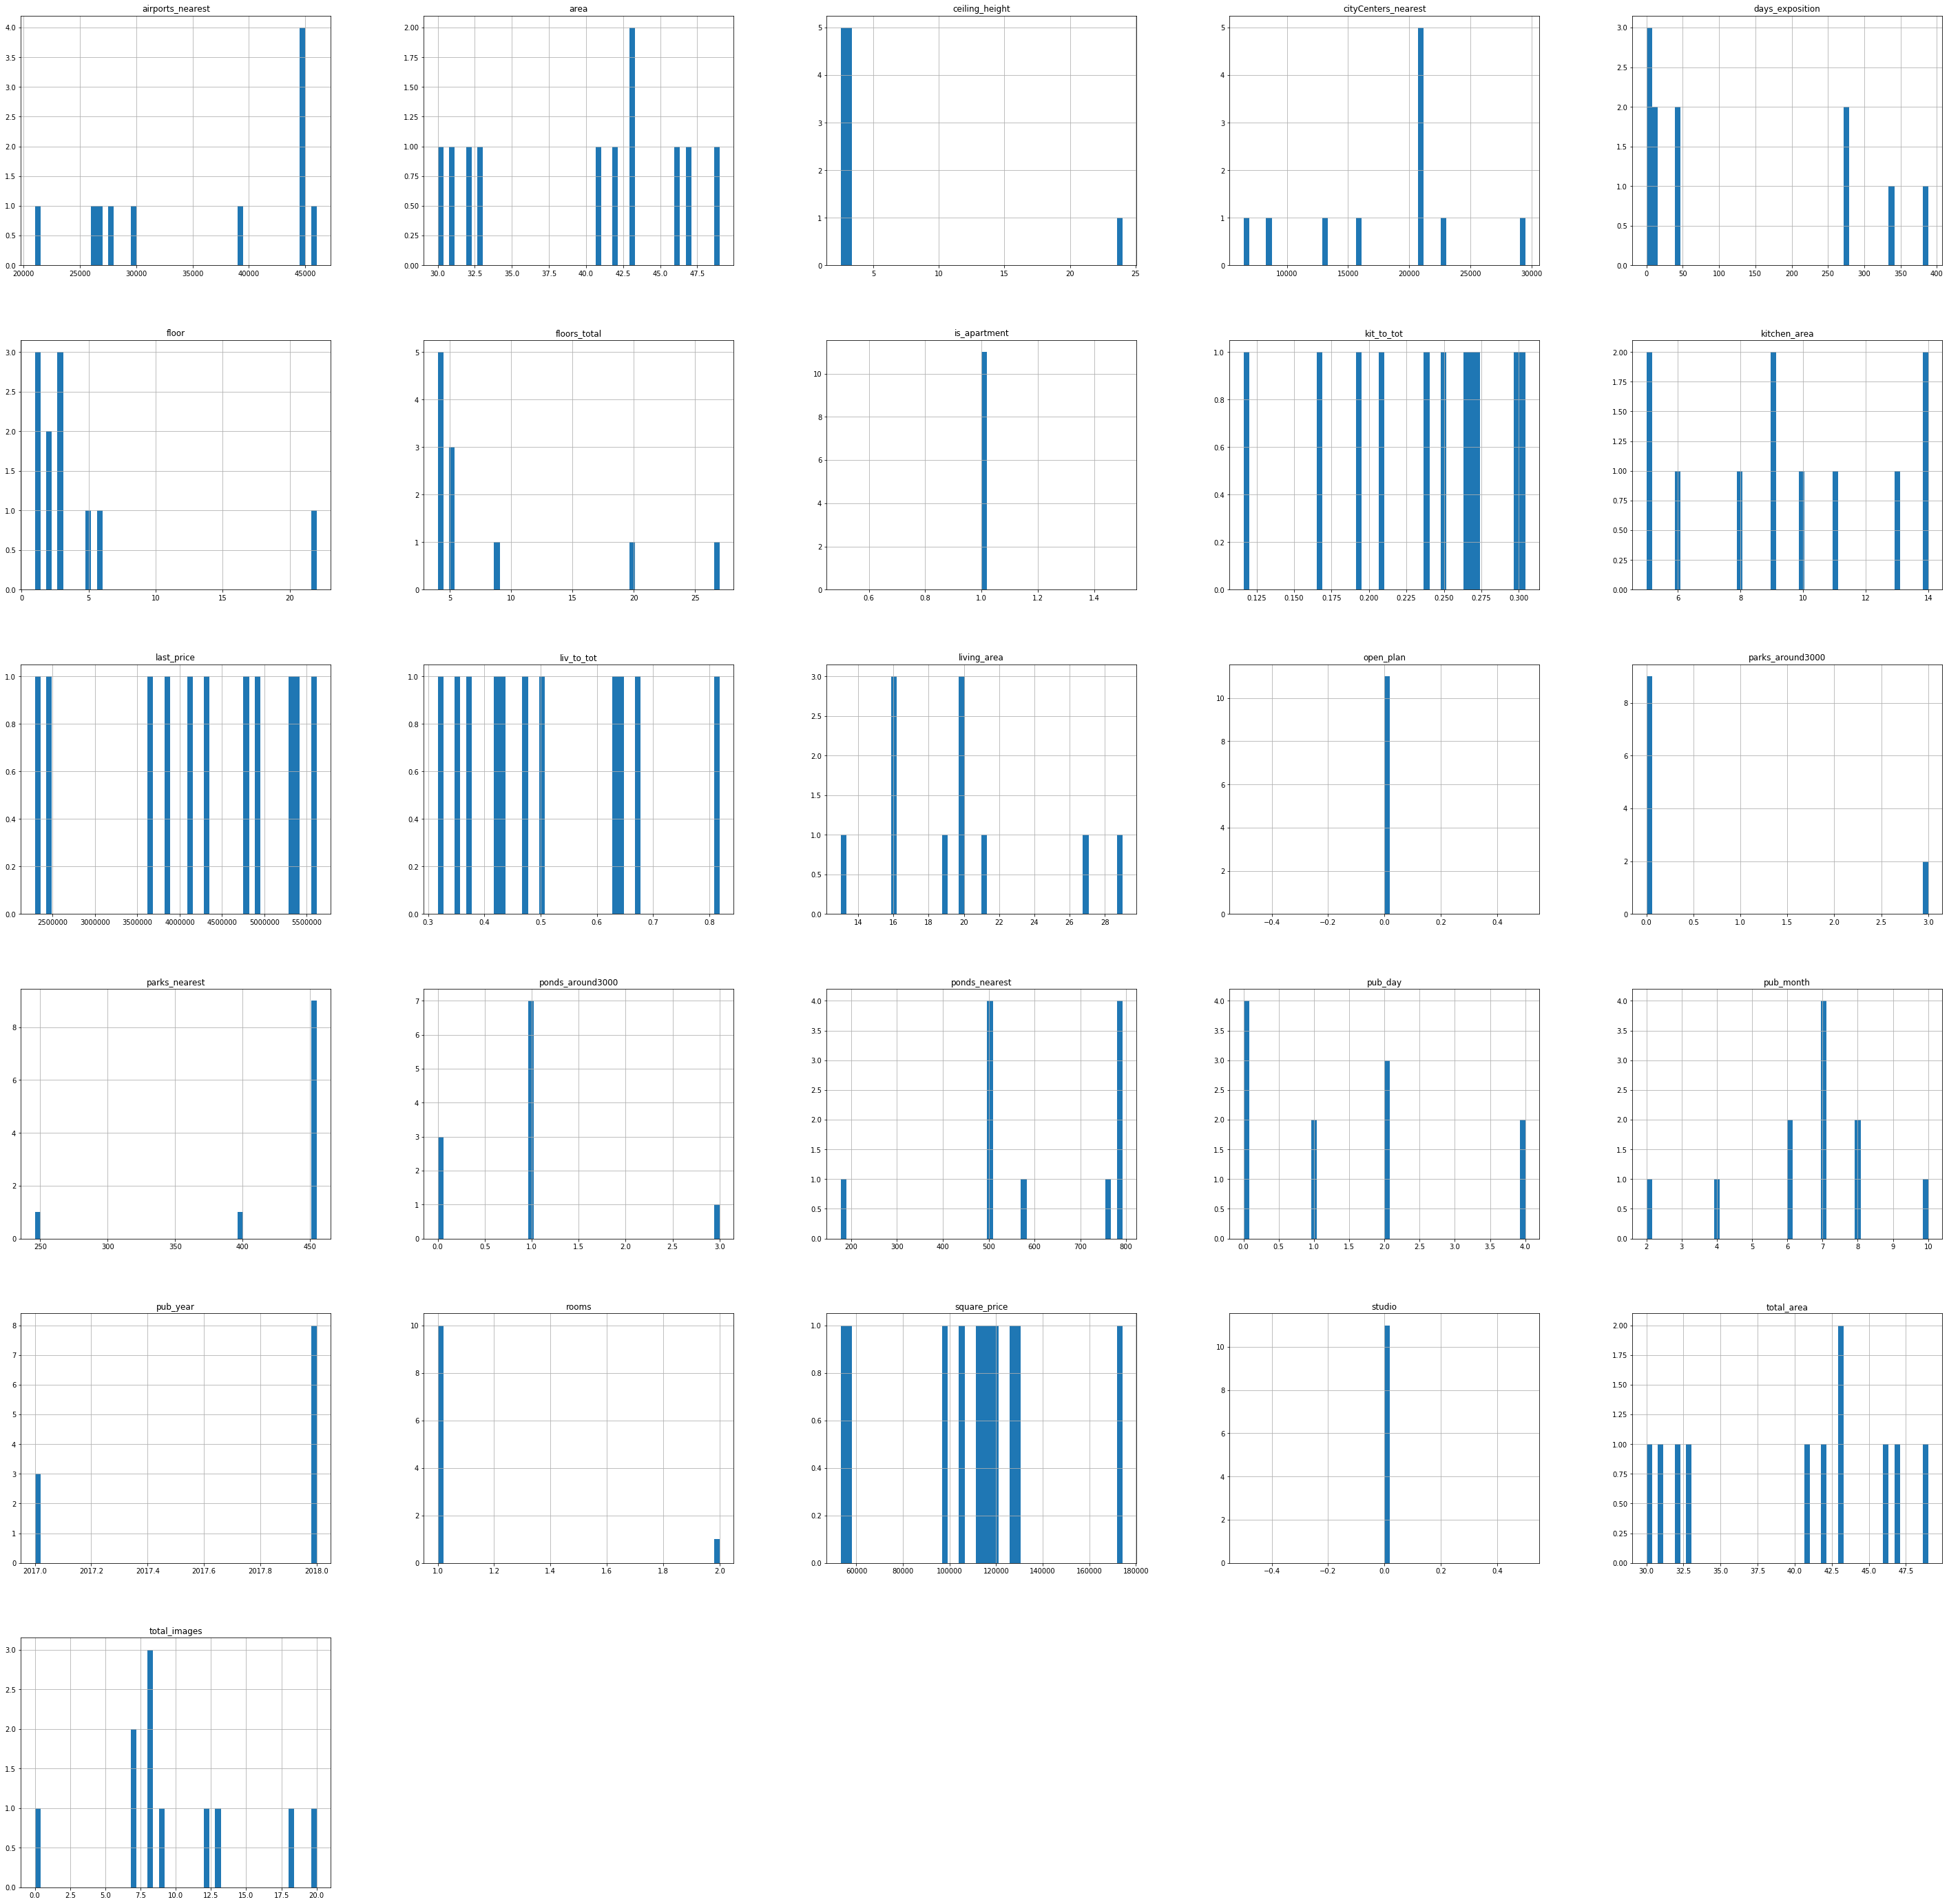

In [49]:
apart_data.hist(bins = 50, figsize = (50, 50))

1. АПАРТАМЕНТЫ:
            Ближайший аэропорт: чаще всего в 45 км.
            Центр города: на расстоянии 21 км.
            Этаж: 1 или 3
            Всего этажей в доме: около 5.
            Площадь кухни: 10 кв. м., также выявляется значительное количество кухонь площадью 14 или 0 м2.
            Отношение площади кухни к общей площади: около 0,3. 
            Жилая площадь: 16 или 20 м2.
            Отношение жилой площади к общей площади: менее 0,5, однако есть некоторое количество объектов с коэффициентом 0,65 и 0,9
            Расстояние до ближайшего  водоема: 800 м или 500 м (реже).
            Расстояние до ближайшего парка: 500 м.
            Типичная дата публикации: чаще всего  в пн или ср. Чаще всего в июле. Большая часть объявлений появилась в 2018 году.
            Количество комнат:  1.
            Цена за кв. м.: в пределах от 100 до 130 тыс. руб. за кв.м. Есть ряд объектов с ценой 60 или 170 т.р. за м2.
            Общая площадь: около 43 м2.
            Всего изображений: обычно 7-8.

In [50]:
studio_data = new_data.query('studio == True')

studio_data.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,floor_type,liv_to_tot,kit_to_tot
144,"144,144,",1,2450000,27,2017-03-30,0,2.771499,24,15,2,...,1,502,181,90740.740741,3,3,2017,другой,0.555556,0.333333
440,"440,440,",8,2480000,27,2018-03-12,0,2.771499,17,24,4,...,2,982,64,91851.851852,0,3,2018,другой,0.888889,0.333333
1173,"1173,1173,",12,3240000,29,2018-10-30,0,2.771499,24,17,2,...,1,475,13,111724.137931,1,10,2018,другой,0.586207,0.310345
1220,"1220,1220,",5,3300000,27,2017-11-10,0,2.800000,17,20,16,...,1,528,113,122222.222222,4,11,2017,другой,0.740741,0.333333
1260,"1260,1260,",0,2600000,27,2018-07-20,0,2.700000,16,16,4,...,1,502,102,96296.296296,4,7,2018,другой,0.592593,0.333333
1528,"1528,1528,",8,1950000,31,2019-01-29,0,2.771499,18,18,11,...,1,502,0,62903.225806,1,1,2019,другой,0.580645,0.290323
1600,"1600,1600,",11,2550000,30,2017-11-10,0,2.750000,23,15,11,...,1,429,19,85000.000000,4,11,2017,другой,0.500000,0.300000
2055,"2055,2055,",14,2300000,29,2018-03-29,0,2.600000,26,22,9,...,1,502,115,79310.344828,3,3,2018,другой,0.758621,0.310345
2270,"2270,2270,1564812.0",19,3550000,27,2017-12-06,0,2.750000,18,18,12,...,0,502,226,131481.481481,2,12,2017,другой,0.666667,0.333333
2475,"2475,2475,1564812.0",4,2000000,27,2018-09-07,0,2.600000,17,17,1,...,1,502,131,74074.074074,4,9,2018,первый,0.629630,0.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d658a58>,
      dtype=object)

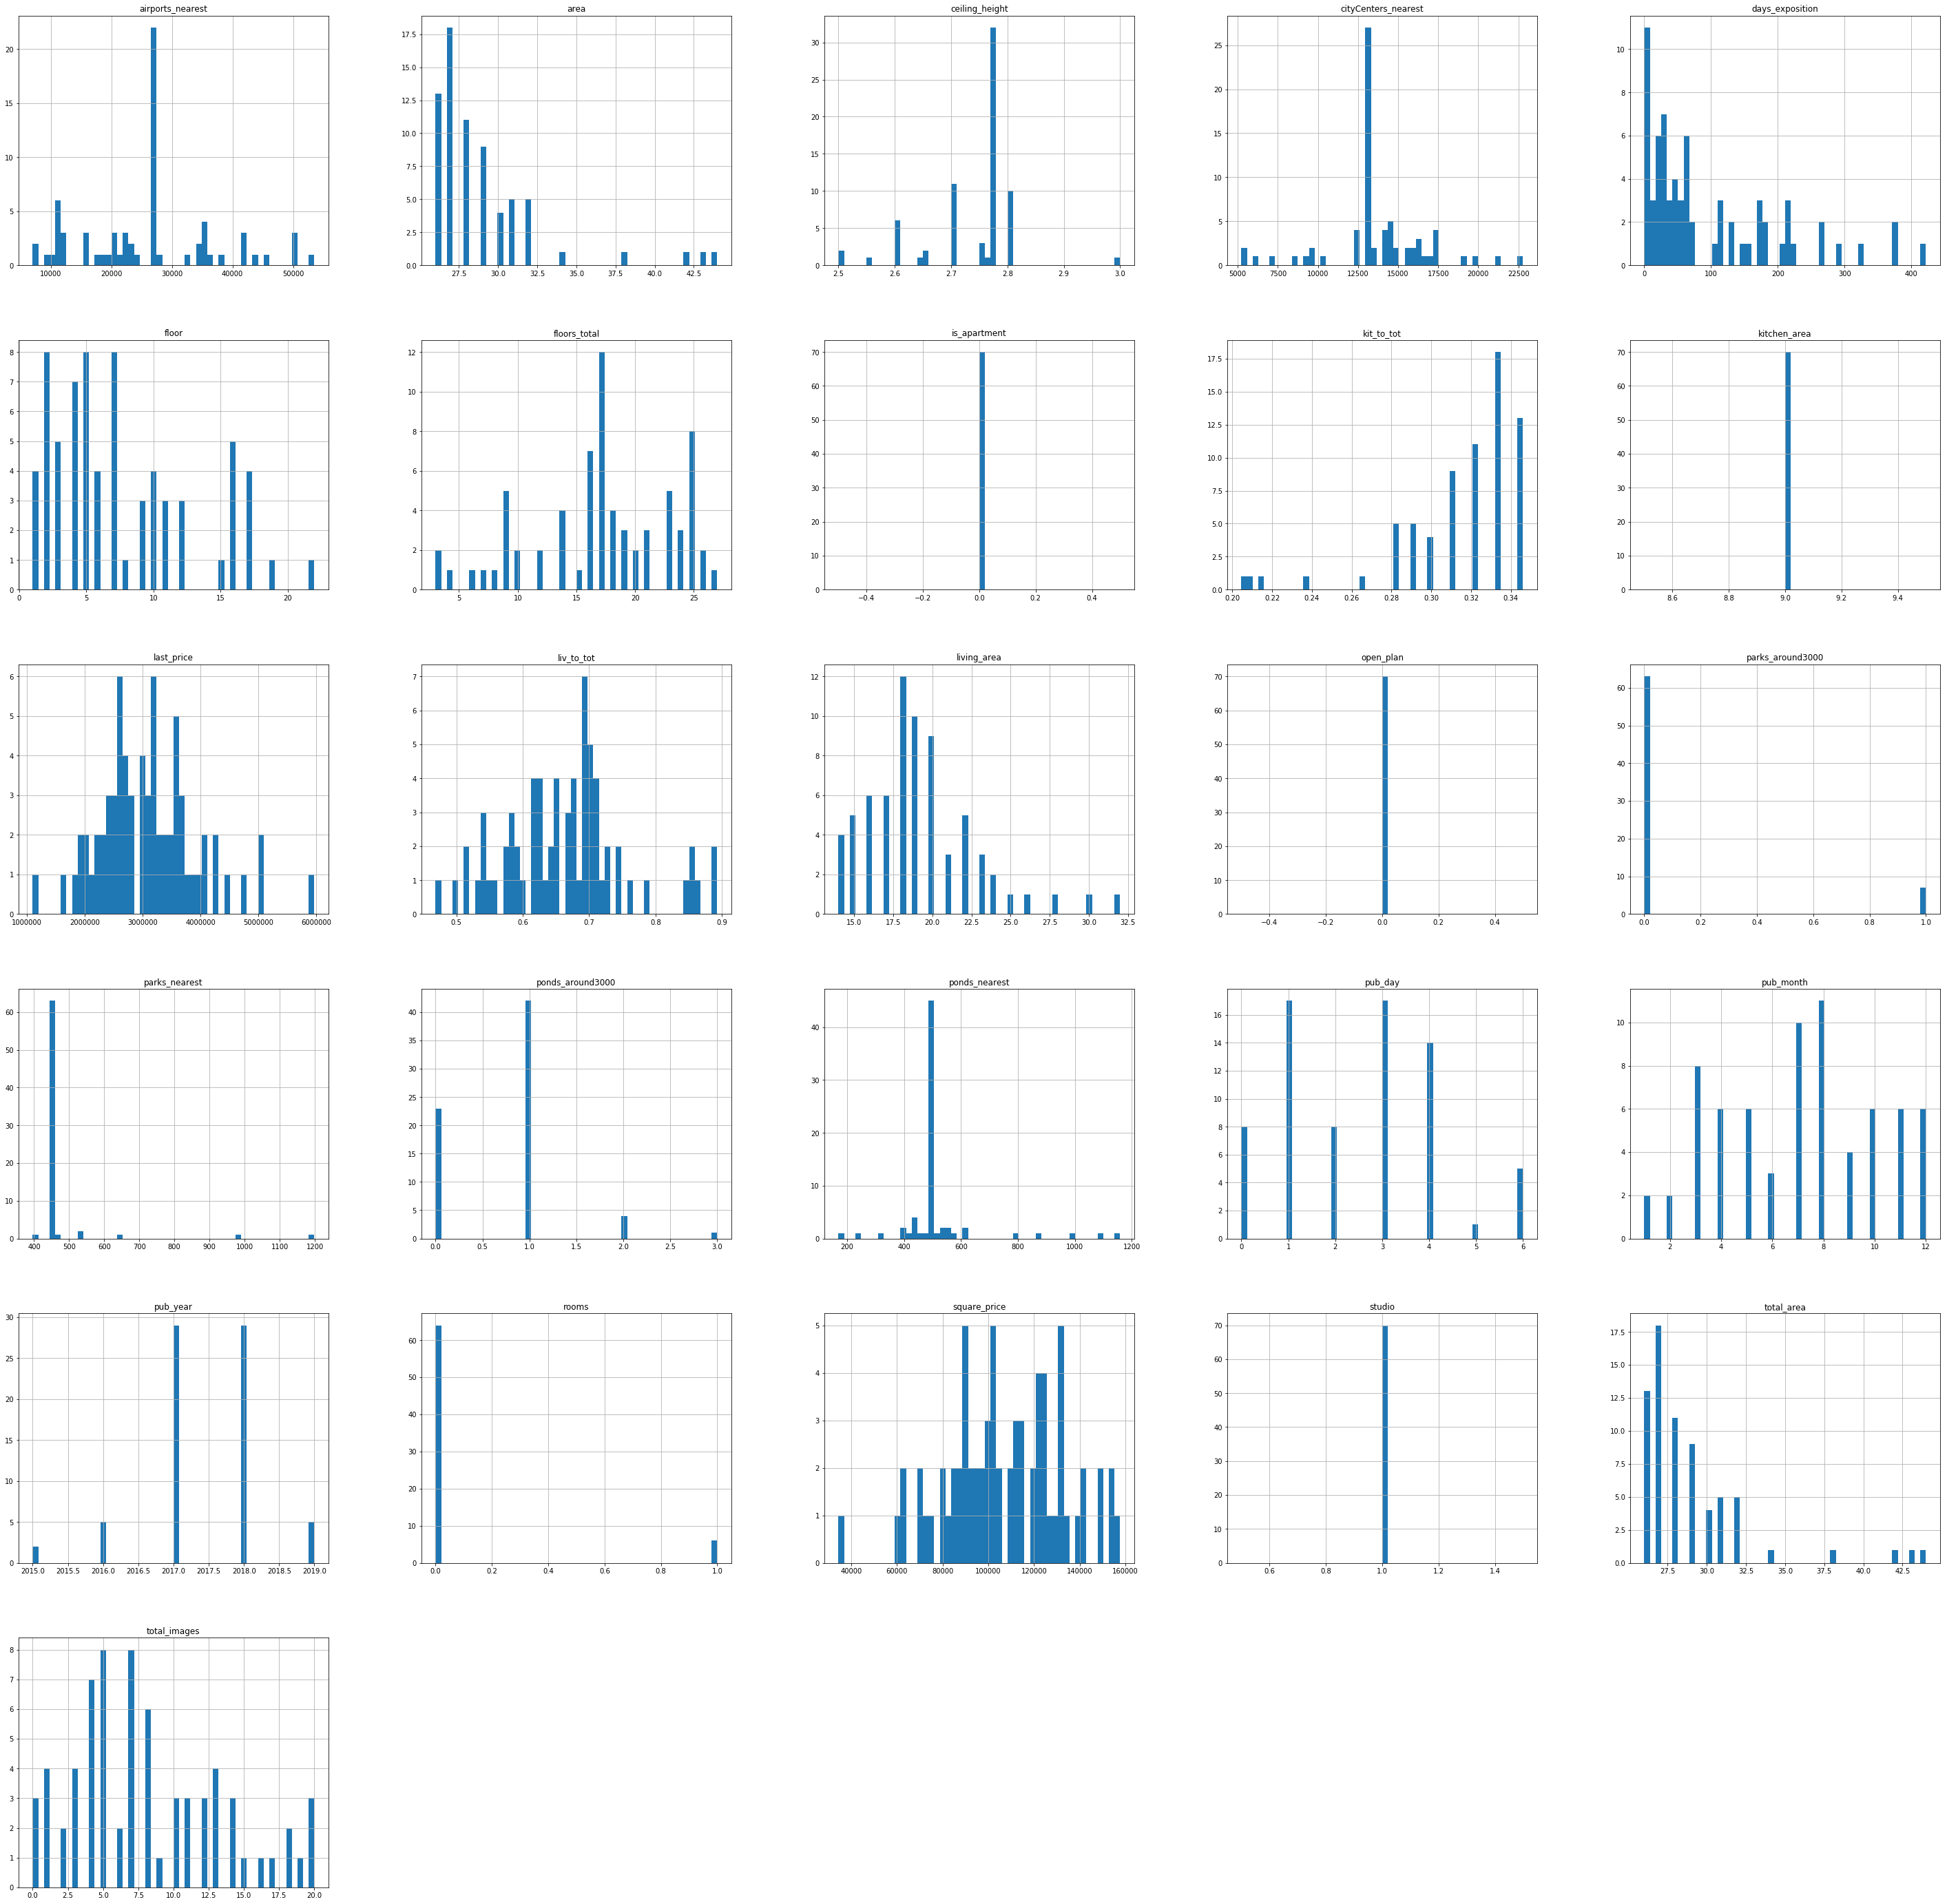

In [51]:
studio_data.hist(bins = 50, figsize = (50, 50))

СТУДИИ:

            Ближайший аэропорт: в 30 км.
            Центр города: 14 км или  12-13 км.
            Этаж: 2, 5 или 7.
            Всего этажей в доме: 16 или 25
            Площадь кухни: 11 м2
            Отношение площади кухни к общей площади: 0,41
            Жилая площадь: 18 м2.
            Отношение жилой площади к общей площади:  около 0.7
            Расстояние до ближайшего  водоема: 500 м.
            Расстояние до ближайшего парка: 500 м.
            Типичная дата  публикации: больше всего объявлений появляется в июле-августе. Большее число объявлений в пн, ср-чт. Наибольшее число объявлений появилось в 2017-2018 годах.
            Количество комнат: 0
            Цена за кв. м.: около 100 т.р., 90 или 130 т.р.
            Общая площадь: 25 м2.
            Всего изображений: Обычно около 5 или 7.

In [52]:
freePlan = new_data.query('open_plan == True')

freePlan.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,floor_type,liv_to_tot,kit_to_tot
508,"508,508,",0,3375000,34,2017-03-28,0,2.771499,26,24,19,...,1,593,430,99264.705882,1,3,2017,другой,0.705882,0.264706
839,"839,839,",14,1900000,35,2017-04-14,0,2.700000,5,15,3,...,1,502,7,54285.714286,4,4,2017,другой,0.428571,0.257143
1379,"1379,1379,",3,6000000,44,2015-11-10,1,2.771499,25,17,23,...,0,502,231,136363.636364,1,11,2015,другой,0.386364,0.204545
2532,"2532,2532,",5,3500000,27,2018-02-01,0,2.771499,18,18,9,...,1,644,70,129629.629630,3,2,2018,другой,0.666667,0.333333
4683,"4683,4683,",2,3650000,35,2018-02-01,0,2.771499,25,23,25,...,0,502,100,104285.714286,3,2,2018,последний,0.657143,0.257143
5668,"5668,5668,",9,3550000,36,2016-04-25,1,2.750000,16,17,2,...,1,502,61,98611.111111,0,4,2016,другой,0.472222,0.250000
6472,"6472,6472,",13,3620000,28,2017-11-10,0,2.700000,20,18,17,...,0,502,37,129285.714286,4,11,2017,другой,0.642857,0.321429
6612,"6612,6612,",18,3590000,26,2017-11-10,0,2.771499,24,19,20,...,0,502,15,138076.923077,4,11,2017,другой,0.730769,0.346154
6805,"6805,6805,",7,1850000,31,2017-11-10,0,2.771499,18,18,10,...,1,502,7,59677.419355,4,11,2017,другой,0.580645,0.290323
7008,"7008,7008,",4,5200000,32,2017-09-14,0,2.771499,11,25,4,...,1,936,86,162500.000000,3,9,2017,другой,0.781250,0.281250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab30748>,
      dtype=object)

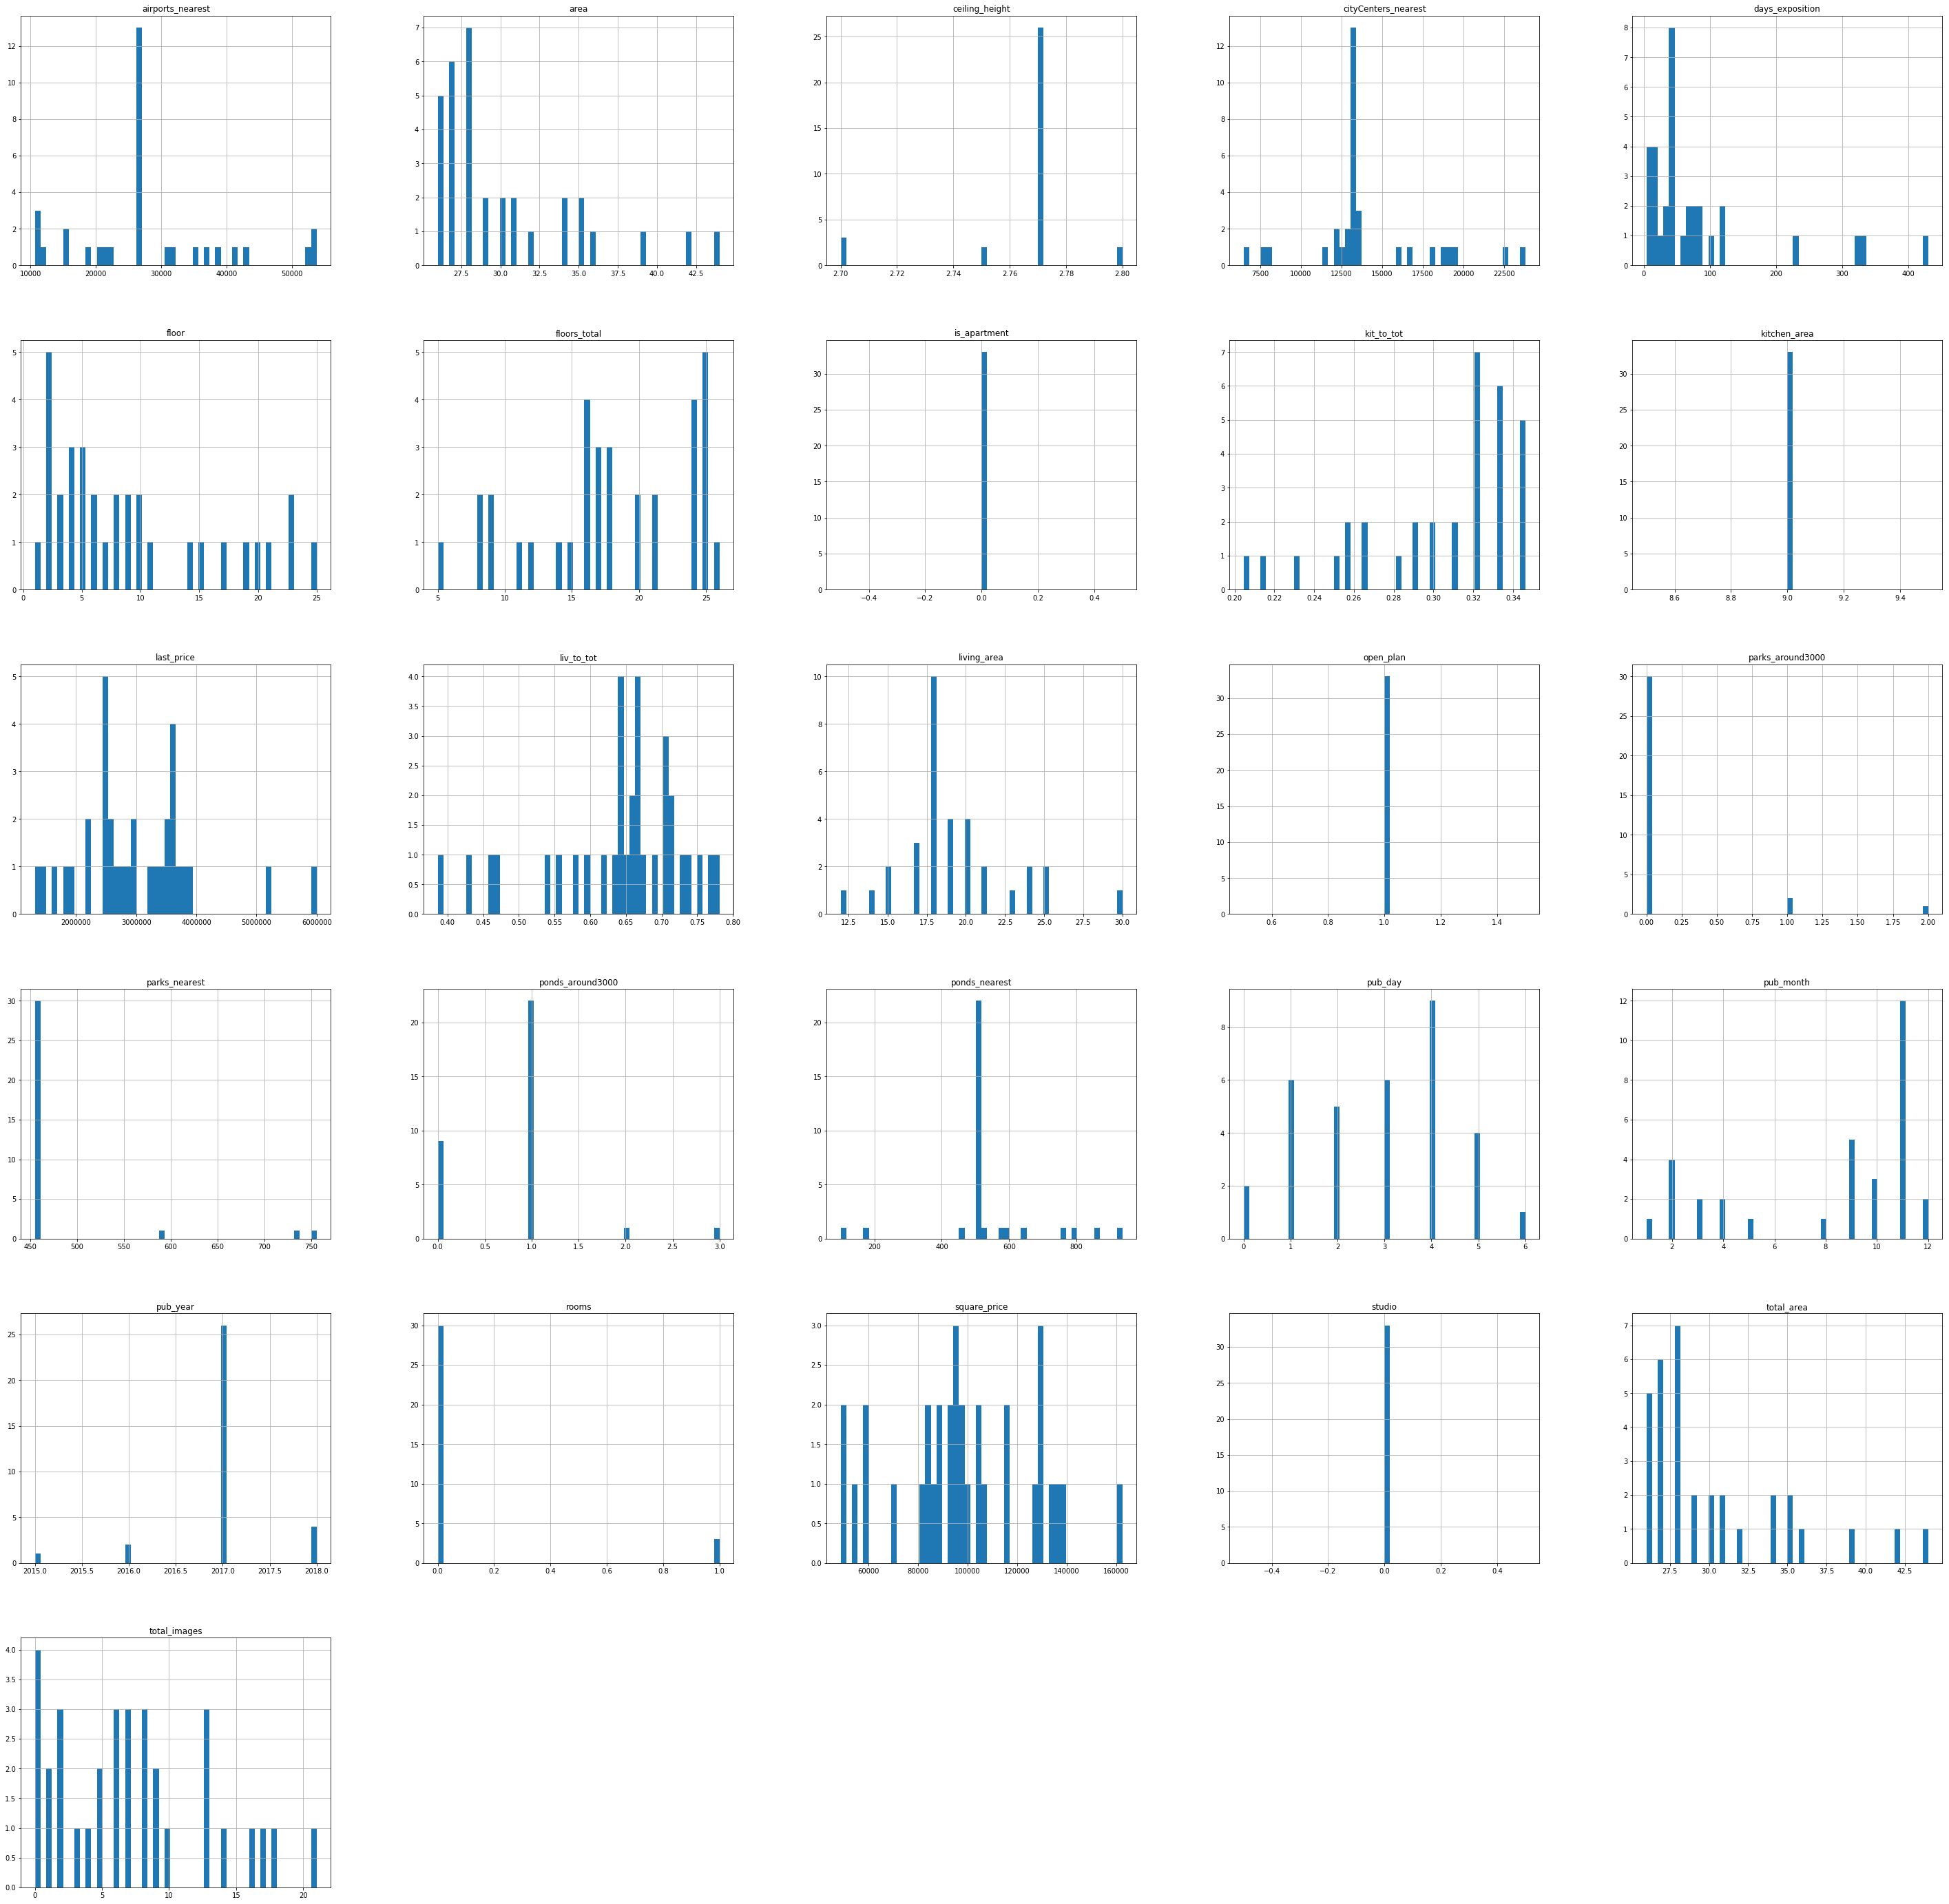

In [53]:
freePlan.hist(bins = 50, figsize = (50, 50))

СВОБОДНАЯ ПЛАНИРОВКА:

            Ближайший аэропорт: около 28 км или 31 км.
            Центр города: в 12,5 км или в 15 км.
            Всего этажей в доме: 25 этажей или 24, или 16
            Этаж: 3 или 4-5 (в два раза реже)
            Площадь кухни: 11 м2.
            Отношение площади кухни к общей площади: 0.39-0.42
            Жилая площадь: 18 м2
            Отношение жилой площади к общей площади: от 0,65 до 0,7
            Расстояние до ближайшего  водоема: 500 м.
            Расстояние до ближайшего парка: 450 м.
            Типичная дата  публикации: Чаще всего в пт. Больше всего объявлений в ноябре, чуть реже -  в сентябре. Большее число объявлений появились в 2017 г.
            Количество комнат: 0
            Цена за кв. м.: 95 и 130 т.р за кв. м.
            Общая площадь: около 26-27 м2.
            Всего изображений: Чаще всего пользователи предпочитают не выкладывать фото или предпочитают выкладывать в пределах 2, 6-8 или 13 фото.

In [54]:
usual_flats = new_data.query('is_apartment == False and studio == False and open_plan == False')
usual_flats.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_price,pub_day,pub_month,pub_year,floor_type,liv_to_tot,kit_to_tot
1,"1,1,",7,3350000,40,2018-12-04,1,2.771499,11,18,1,...,0,502,81,83750.000000,1,12,2018,первый,0.450000,0.275000
5,"5,5,",10,2890000,30,2018-09-10,1,2.771499,12,14,5,...,1,502,55,96333.333333,0,9,2018,другой,0.466667,0.300000
6,"6,6,",6,3700000,37,2017-11-02,1,2.771499,26,10,6,...,0,502,155,100000.000000,3,11,2017,другой,0.270270,0.378378
8,"8,8,",20,2900000,33,2018-05-23,1,2.771499,27,15,26,...,1,502,189,87878.787879,2,5,2018,другой,0.454545,0.242424
10,"10,10,",5,5050000,39,2017-11-16,1,2.670000,12,20,3,...,2,553,137,129487.179487,3,11,2017,другой,0.512821,0.205128
11,"11,11,",9,3300000,44,2018-08-27,2,2.771499,5,31,4,...,0,502,7,75000.000000,0,8,2018,другой,0.704545,0.136364
13,"13,13,1568627.0",20,3550000,42,2017-07-01,2,2.560000,5,27,5,...,3,298,366,84523.809524,5,7,2017,последний,0.642857,0.119048
14,"14,14,",1,4400000,36,2016-06-23,1,2.771499,6,17,1,...,1,96,203,122222.222222,3,6,2016,первый,0.472222,0.222222
15,"15,15,",16,4650000,39,2017-11-18,1,2.771499,14,20,5,...,1,296,19,119230.769231,5,11,2017,другой,0.512821,0.179487
18,"18,18,",8,3250000,31,2017-01-27,1,2.500000,5,19,2,...,0,502,168,104838.709677,4,1,2017,другой,0.612903,0.161290


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125ce80b8>,
      dtype=object)

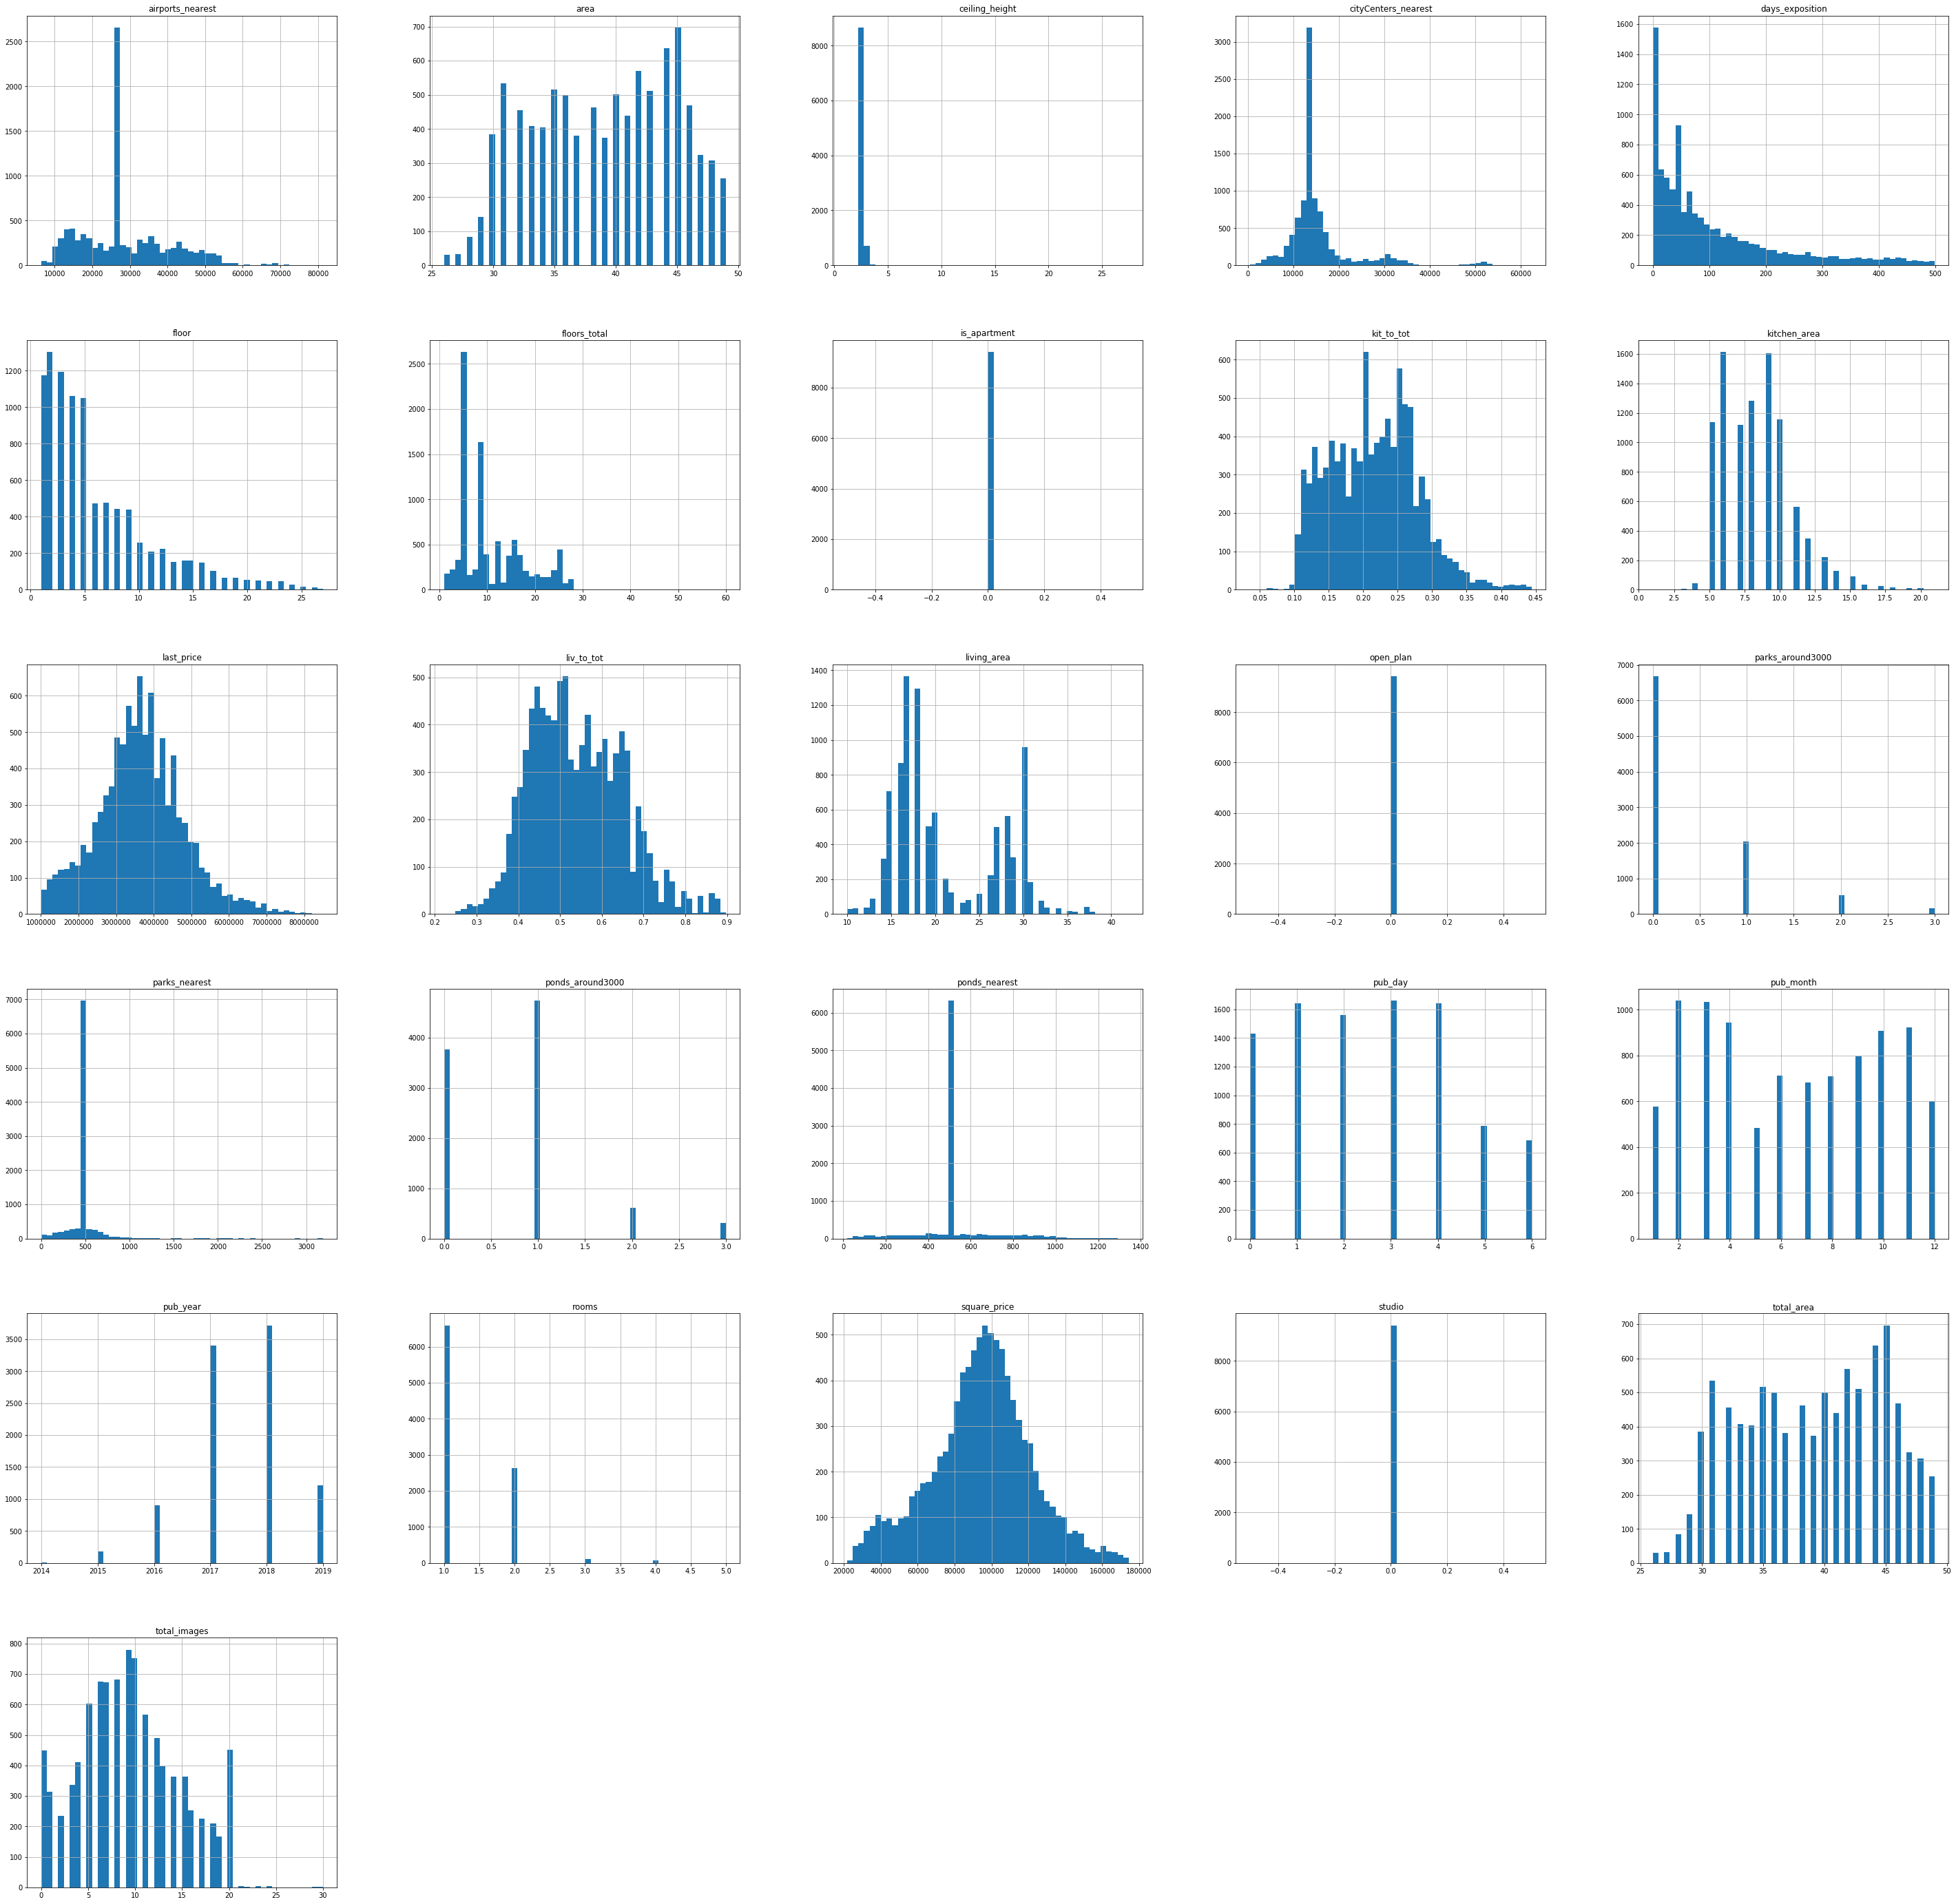

In [55]:
usual_flats.hist(bins = 50, figsize = (50, 50))

ОБЫЧНАЯ КВАРТИРА:

            Ближайший аэропорт: в 28 км.
            Центр города: в 15 км.
            Высота потолков: 2,5 м.
            Всего этажей в доме: 5 или 9.
            Площадь кухни: 10 м2 или 5-6 м2
            Отношение площади кухни к общей площади: 0,25 или 0,28
            Жилая площадь: 16-18 м2.
            Отношение жилой площади к общей площади: от 0,5 или 0.4-0.5
            Расстояние до ближайшего  водоема: 500 м 
            Расстояние до ближайшего парка: 500 м
            Типичная дата  публикации: равномерно в рабочие дни. В течении года чаще всего  в период с февраля по апрель. Больше всего объявлений в 2017-2018 годах.
            Количество комнат: 1 или 2.
            Цена за кв. м.: около 90-110  т.р.
            Общая площадь: 45 м2 или 35 м2.
            Всего изображений:  около 10.
        

## Выводы:

    Для оценки различных типов недвижимости использовались срезы данных по условиям для последующего создания гистограмм. На основании построенных  гистограмм по всем предоставленным данным можно создать "типичную картину" того или иного вида недвижимости:
        1. АПАРТАМЕНТЫ:
            Ближайший аэропорт: чаще всего в 45 км.
            Центр города: на расстоянии 21 км.
            Этаж: 1 или 3
            Всего этажей в доме: около 5.
            Площадь кухни: 10 кв. м., также выявляется значительное количество кухонь площадью 14 или 0 м2.
            Отношение площади кухни к общей площади: около 0,3. 
            Жилая площадь: 16 или 20 м2.
            Отношение жилой площади к общей площади: менее 0,5, однако есть некоторое количество объектов с коэффициентом 0,65 и 0,9
            Расстояние до ближайшего  водоема: 800 м или 500 м (реже).
            Расстояние до ближайшего парка: 500 м.
            Типичная дата публикации: чаще всего  в пн или ср. Чаще всего в июле. Большая часть объявлений появилась в 2018 году.
            Количество комнат:  1.
            Цена за кв. м.: в пределах от 100 до 130 тыс. руб. за кв.м. Есть ряд объектов с ценой 60 или 170 т.р. за м2.
            Общая площадь: около 43 м2.
            Всего изображений: обычно 7-8.
            
        2. СТУДИИ:
            Ближайший аэропорт: в 30 км.
            Центр города: 14 км или  12-13 км.
            Этаж: 2, 5 или 7.
            Всего этажей в доме: 16 или 25
            Площадь кухни: 11 м2
            Отношение площади кухни к общей площади: 0,41
            Жилая площадь: 18 м2.
            Отношение жилой площади к общей площади:  около 0.7
            Расстояние до ближайшего  водоема: 500 м.
            Расстояние до ближайшего парка: 500 м.
            Типичная дата  публикации: больше всего объявлений появляется в июле-августе. Большее число объявлений в пн, ср-чт. Наибольшее число объявлений появилось в 2017-2018 годах.
            Количество комнат: 0
            Цена за кв. м.: около 100 т.р., 90 или 130 т.р.
            Общая площадь: 25 м2.
            Всего изображений: Обычно около 5 или 7.
        
        3. СВОБОДНАЯ ПЛАНИРОВКА:
            Ближайший аэропорт: около 28 км или 31 км.
            Центр города: в 12,5 км или в 15 км.
            Всего этажей в доме: 25 этажей или 24, или 16
            Этаж: 3 или 4-5 (в два раза реже)
            Площадь кухни: 11 м2.
            Отношение площади кухни к общей площади: 0.39-0.42
            Жилая площадь: 18 м2
            Отношение жилой площади к общей площади: от 0,65 до 0,7
            Расстояние до ближайшего  водоема: 500 м.
            Расстояние до ближайшего парка: 450 м.
            Типичная дата  публикации: Чаще всего в пт. Больше всего объявлений в ноябре, чуть реже -  в сентябре. Большее число объявлений появились в 2017 г.
            Количество комнат: 0
            Цена за кв. м.: 95 и 130 т.р за кв. м.
            Общая площадь: около 26-27 м2.
            Всего изображений: Чаще всего пользователи предпочитают не выкладывать фото или предпочитают выкладывать в пределах 2, 6-8 или 13 фото.
        
        4. ОБЫЧНАЯ КВАРТИРА:
            Ближайший аэропорт: в 28 км.
            Центр города: в 15 км.
            Высота потолков: 2,5 м.
            Всего этажей в доме: 5 или 9.
            Площадь кухни: 10 м2 или 5-6 м2
            Отношение площади кухни к общей площади: 0,25 или 0,28
            Жилая площадь: 16-18 м2.
            Отношение жилой площади к общей площади: от 0,5 или 0.4-0.5
            Расстояние до ближайшего  водоема: 500 м 
            Расстояние до ближайшего парка: 500 м
            Типичная дата  публикации: равномерно в рабочие дни. В течении года чаще всего  в период с февраля по апрель. Больше всего объявлений в 2017-2018 годах.
            Количество комнат: 1 или 2.
            Цена за кв. м.: около 90-110  т.р.
            Общая площадь: 45 м2 или 35 м2.
            Всего изображений:  около 10.
        